IA & Data science (LU3IN0226) -- 2021-2022
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Olivier Schwander.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

*Double-cliquer ici et insérer les noms et prénoms de votre binôme*

<b>Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.</b>
Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

<b>Les groupes de plus de 2 personnes ne sont pas autorisés.</b>

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2</tt> et rajouter à la suite de <tt>projet-2</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-2-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 2 - avril-mai 2022


<font size="+1" color="RED"><b>Date de rendu : lundi 9 mai, 19h au plus tard</b></font>
    
(<b>attention! le site Moodle ferme à 19h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...)


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données Agribalise qui sont des données ouvertes dont la documentation peut être consultée ici : https://doc.agribalyse.fr/documentation/acces-donnees

Très important : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb
              -- Donnees_Agribalyse/
                  -- detail_ingredient.csv
                  -- detail_etape.csv
                  -- synthese.csv

Dans le notebook, le chargement des fichiers de données considèrera donc cette arborescence.

## Travail à faire

Appliquer les algorithmes d'apprentissage vus tout au long du semestre sur les données afin de mettre en évidence des résultats intéressants.
Deux problèmes, au moins, doivent être traités:
- un problème d'apprentissage supervisé
- un problème d'apprentissage non supervisé


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive du répertoire iads/
- un fichier PDF dont le nom est de la forme: *projet-1-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: Les fichiers de données ne doivent pas être inclus dans votre archive !

## Soutenance des projets
La soutenance sera organisée après la semaine d'examens de mai entre le 17 et le 25 mai (la date sera précisé sur le forum du Moodle).

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.




In [82]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import seaborn as sns
import math
import time
import graphviz as gv
import random

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
patients_df = pd.read_json('Donnees_Agribalyse/Agribalyse.json')
patients_df.head()

,nom_francais,LCI_name,ciqual_AGB,ciqual_code,groupe,sous_groupe,saison,avion,materiau_emballage,Livraison,Preparation,DQR,impact_environnemental
0,Pastis,Pastis (anise-flavoured spirit),1000,1000,boissons,boisson alcoolisées,mix de consommation FR,False,Verre,Ambiant (moyenne),Réfrigéré chez le consommateur,"{'overall': '3.29', 'P': '2.49', 'TiR': '2.73'...",{'Score unique EF': {'synthese': 0.12303632999...
1,Eau de vie,Clear fruit brandy or eau-de-vie,1001,1001,boissons,boisson alcoolisées,mix de consommation FR,False,Verre,Ambiant (moyenne),Pas de préparation,"{'overall': '3.3', 'P': '2.48', 'TiR': '2.72',...","{'Score unique EF': {'synthese': 0.12053738, '..."
2,Gin,Gin,1002,1002,boissons,boisson alcoolisées,mix de consommation FR,False,Verre,Ambiant (moyenne),Réfrigéré chez le consommateur,"{'overall': '3.29', 'P': '2.49', 'TiR': '2.73'...",{'Score unique EF': {'synthese': 0.12296672000...
3,Liqueur,Liqueur,1003,1003,boissons,boisson alcoolisées,mix de consommation FR,False,Déjà emballé - Verre,Ambiant (moyenne),Réfrigéré chez le consommateur,"{'overall': '3.68', 'P': '2.54', 'TiR': '3.69'...",{'Score unique EF': {'synthese': 0.25146514999...
4,Rhum,Rum,1004,1004,boissons,boisson alcoolisées,mix de consommation FR,False,Verre,Ambiant (moyenne),Réfrigéré chez le consommateur,"{'overall': '3.29', 'P': '2.49', 'TiR': '2.73'...",{'Score unique EF': {'synthese': 0.12296672000...


# Approche de résolution du projet

<div class="alert alert-info" role="alert">
 Afin de bien mener ce projet, nous avons décidé de définir dés le début une méthode de travail (approche) nous permettant à la fois de répondre au cahier des charges et respecter les deadlines, pour cela nous avons choisi l'approche PPDAC : 
    <ul>
        <li>Problem : Bien cadrer notre problème</li>
        <li>Plan : définir un schéma experimental afin de résoudre le problème</li>
        <li>Data : Explorer les données</li>
        <li>Analysis : faire des manipulations sur les données, appliquer des modèles d'apprentissage  et évaluer les performances</li>
        <li>Conclusion : Conclure par rapport aux résultats des étapes précédentes</li>
    </ul></div>

# Schéma expérimental

<div class="alert alert-info" role="alert">
<ul>
    <li><b>Exploration des données :</b> prise en main des données, comprendre les attributs et les associations qui peuvent exister entre les tables de notre base de données.</li>
    <li><b>Prétraitement des données :</b> Appliquer des transformations sur les données pour les rendre plus significatifs, et assurer la cohérence entre les différentes valeurs possibles par attribut.</li>
    <li><b>Entrainement des modèles :</b> Selection de la base d'apprentissage pour chaque problème identifié, et résoudre ce problème avec les différents algorithmes doint on dispose.</li>
    <li><b>Evaluation des modèles :</b> Choisir une méthode d'évaluation à appliquer sur les modèles.</li>
    <li><b>Synthèse et Justification des résultats obtenus</b>.</li>
</ul>
</div>

***

# 1 Table synthèse

## 1.1 Exploration des données

<div class="alert alert-info" role="alert">
En premier lieu, nous allons dans la découverte et la prise en main des données, pour cela nous allons effectuer des affichages, visualisations, analyse statistiques (dispersion, médiane ..) que nous jugeons pertinentes afin de mieux comprendre les données.
</div>

In [84]:
# Chargement des données
data_synthese = pd.read_csv("Donnees_Agribalyse/synthese.csv")
data_synthese.columns
print("Taille du dataset: ",data_synthese.shape)

Taille du dataset:  (2479, 27)


In [85]:
# Conversion vers numpy array
arr = np.array(data_synthese)
a = np.unique(arr[:,4])
a

array(['Abricot au sirop léger, appertisé, non égoutté',
       'Abricot au sirop léger, appertisé, égoutté',
       'Abricot au sirop, appertisé, non égoutté', ...,
       'Épinard, surgelé, cuit', 'Épinards à la crème', 'Époisses'],
      dtype=object)

In [86]:
#get an overview of the data
data_synthese.head()

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,Saisonnalité,Transport par avion (1 : par avion),Livraison,Matériau d'emballage,...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
1,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
2,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
3,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
4,13000,13000,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, cru","Apricot, pitted, raw",mix de consommation FR,0,Ambiant (moyenne),LPDE,...,0.061462,0.007254,0.025954,0.204244,0.943669,43.838644,41.957928,1.412878,17.123820,2.173328


In [87]:
data_synthese.tail()

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,Saisonnalité,Transport par avion (1 : par avion),Livraison,Matériau d'emballage,...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
2474,19592,19592,lait et produits laitiers,produits laitiers frais et assimilés,"Yaourt, lait fermenté ou spécialité laitière, ...","Yogurt, fermented milk or dairy specialty, wit...",mix de consommation FR,0,Glacé,PP,...,0.173049,0.022129,0.092536,0.257436,15.198522,136.090810,216.954380,2.253106,26.865322,5.020883
2475,19593,19593,lait et produits laitiers,produits laitiers frais et assimilés,"Yaourt, lait fermenté ou spécialité laitière, ...","Yogurt, fermented milk or dairy specialty, plain",mix de consommation FR,0,Glacé,PP,...,0.155803,0.022678,0.095881,0.235488,13.642379,133.154710,24.979408,0.636518,25.746521,1.838004
2476,19594,19594,lait et produits laitiers,produits laitiers frais et assimilés,"Yaourt, lait fermenté ou spécialité laitière, ...","Yogurt, fermented milk or dairy specialty, pla...",mix de consommation FR,0,Glacé,PP,...,0.155803,0.022678,0.095881,0.235488,13.642379,133.154710,24.979408,0.636518,25.746521,1.838004
2477,19598,19598,lait et produits laitiers,produits laitiers frais et assimilés,"Yaourt, lait fermenté ou spécialité laitière, ...","Yogurt, fermented milk or dairy specialty, pla...",mix de consommation FR,0,Glacé,PP,...,0.165113,0.023417,0.097687,0.297081,14.777646,138.486420,32.692803,0.862339,27.136623,2.858934
2478,19599,19599,lait et produits laitiers,produits laitiers frais et assimilés,"Yaourt, lait fermenté ou spécialité laitière, ...","Yogurt, fermented milk or dairy specialty, pla...",mix de consommation FR,0,Glacé,PP,...,0.117408,0.016494,0.068690,0.195654,5.278662,71.509189,24.816685,0.737776,24.936760,1.878770


In [88]:
data_synthese.sample(5)

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,Saisonnalité,Transport par avion (1 : par avion),Livraison,Matériau d'emballage,...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
1755,26271,26271,entrées et plats composés,"pizzas, tartes et crêpes salées",Pizza kebab,"Pizza, kebab",mix de consommation FR,0,Glacé,Carton,...,0.307072,0.042517,0.179607,0.553631,12.322519,143.393600,98.902521,2.863345,55.518923,5.602604
259,18028,18028,boissons,boissons sans alcool,"Boisson à l'eau minérale ou de source, aromati...","Bottled water, flavoured, without sugar and ar...",mix de consommation FR,0,Glacé,Déjà emballé - PET,...,0.016777,0.001722,0.004286,0.115038,0.395460,2.202497,5.010262,0.221417,11.136347,1.330479
1917,36019,36019,"viandes, œufs, poissons",viandes crues,"Poulet, haut de cuisse, viande, cru","Chicken high leg, meat, raw",mix de consommation FR,0,Glacé,PS,...,0.741468,0.106382,0.441033,1.331726,25.024211,311.417460,164.314570,6.092427,63.856374,8.756875
1001,12012,12012,lait et produits laitiers,fromages,Fromage rond à pâte molle et croûte fleurie en...,"Soft-ripened round cheese with bloomy rind, ar...",mix de consommation FR,0,Glacé,LPDE,...,0.383771,0.056007,0.238339,0.672068,16.868518,268.827470,77.863722,2.013040,29.385881,4.154594
56,20581,20581,"fruits, légumes, légumineuses et oléagineux",fruits à coque et graines oléagineuses,"Arachide, bouillie/cuite à l'eau, salée","Peanut, boiled/cooked in water, w salt",mix de consommation FR,0,Ambiant (long),LPDE,...,0.964548,0.137794,0.580381,3.097926,81.863257,1079.319900,131.647990,12.438554,65.817329,21.019930


In [89]:
# Vue globale sur les données
data_synthese.describe()

,Code CIQUAL,Transport par avion (1 : par avion),DQR - Note de qualité de la donnée (1 excellente ; 5 très faible),Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),Rayonnements ionisants (kBq U-235 eq/kg de produit),Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit),Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
count,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000
mean,22446.076240,0.000807,2.810097,0.712264,5.909752,0.572436,1.239127,21.503554,0.576737,0.082070,0.322537,0.994563,28.171974,308.182513,110.487409,5.755834,53.483357,9.055566
std,14034.948243,0.028398,0.542470,0.885750,9.138402,4.913065,1.898260,42.971933,0.886995,0.131431,0.552303,2.567846,50.225766,659.117300,149.496454,17.266273,56.788961,19.029156
min,1000.000000,0.000000,1.600000,0.006130,0.021047,0.008919,0.040985,0.061076,0.001434,0.000112,0.000257,0.009151,0.029341,-125.337470,1.246828,-15.066491,2.029826,0.108256
25%,12759.500000,0.000000,2.430000,0.168917,1.086875,0.160290,0.448390,3.610219,0.081927,0.009345,0.032719,0.230663,4.955565,26.979608,32.244438,1.200812,23.001550,2.686771
50%,20511.000000,0.000000,2.760000,0.394124,2.718176,0.261981,0.821225,8.112630,0.237220,0.033240,0.119196,0.561079,13.013942,108.803440,74.607942,2.706662,34.986512,5.041574
75%,26105.000000,0.000000,3.110000,0.867402,6.289730,0.540185,1.352461,17.607225,0.692287,0.097694,0.343948,1.054684,27.858909,268.827470,134.641320,5.579348,62.902074,10.082564
max,96778.000000,1.000000,4.870000,6.085768,62.729303,243.449330,33.548897,328.588610,6.372366,0.945773,4.198274,33.277122,668.339590,5537.686700,2965.885600,463.921320,788.907720,258.657730


In [90]:
#identify variable type
data_synthese.dtypes

Code AGB                                                                     object
Code CIQUAL                                                                   int64
Groupe d'aliment                                                             object
Sous-groupe d'aliment                                                        object
Nom du Produit en Français                                                   object
LCI Name                                                                     object
Saisonnalité                                                                 object
Transport par avion (1 : par avion)                                           int64
Livraison                                                                    object
Matériau d'emballage                                                         object
Préparation                                                                  object
DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)           

In [91]:
data_synthese.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Data columns (total 27 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Code AGB                                                                  2479 non-null   object 
 1   Code CIQUAL                                                               2479 non-null   int64  
 2   Groupe d'aliment                                                          2479 non-null   object 
 3   Sous-groupe d'aliment                                                     2479 non-null   object 
 4   Nom du Produit en Français                                                2479 non-null   object 
 5   LCI Name                                                                  2479 non-null   object 
 6   Saisonnalité                                                    

In [92]:
data_synthese.columns

Index(['Code AGB', 'Code CIQUAL', 'Groupe d'aliment', 'Sous-groupe d'aliment',
       'Nom du Produit en Français', 'LCI Name', 'Saisonnalité',
       'Transport par avion (1 : par avion)', 'Livraison',
       'Matériau d'emballage', 'Préparation',
       'DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)',
       'Score unique EF (mPt/kg de produit)',
       'Changement climatique (kg CO2 eq/kg de produit)',
       'Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)',
       'Rayonnements ionisants (kBq U-235 eq/kg de produit)',
       'Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)',
       'Particules (E-06 disease inc./kg de produit)',
       'Acidification terrestre et eaux douces (mol H+ eq/kg de produit)',
       'Eutrophisation terreste (mol N eq/kg de produit)',
       'Eutrophisation eaux douces (E-03 kg P eq/kg de produit)',
       'Eutrophisation marine (E-03 kg N eq/kg de produit)',
       'Utilisation du sol (Pt/kg de p

### Quelques visualisations intéréssantes

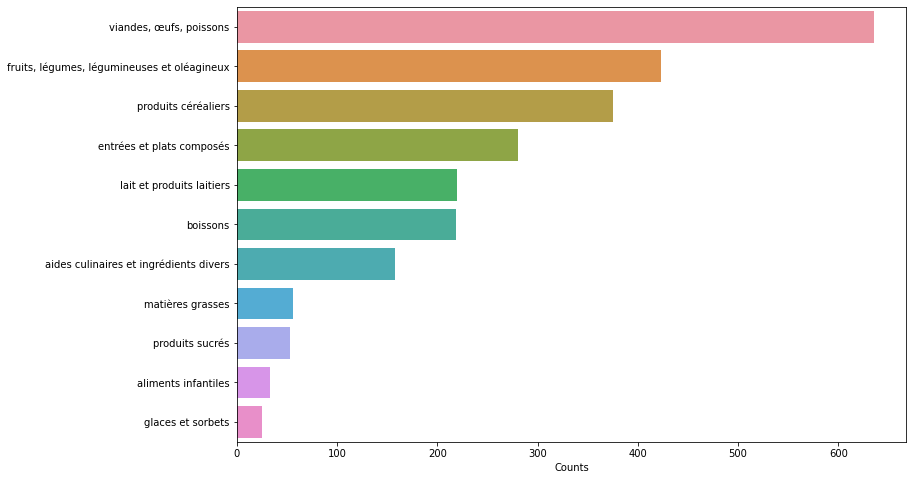

In [14]:
# Bar chart représentats le nombre de groupe d'aliments
plt.figure(figsize=(12, 8))
_ = sns.barplot(x=pd.value_counts(data_synthese["Groupe d'aliment"])[:12], y=pd.value_counts(data_synthese["Groupe d'aliment"])[:12].index)
_ = plt.xlabel("Counts")

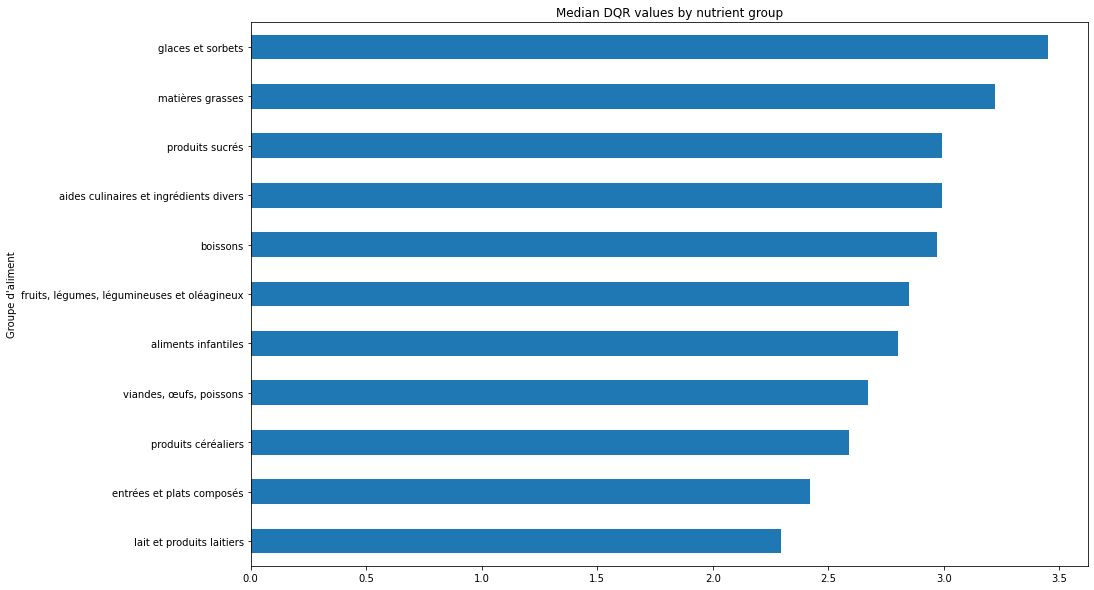

In [15]:
# Affichage de la valeur de la médiane DQR par groupe d'aliment
c = 'DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)'
result = data_synthese.groupby(["Groupe d'aliment"])[c].quantile(0.5)
result.index.values
_ = result.sort_values().plot(kind="barh", figsize=(15, 10), title="Median DQR values by nutrient group")

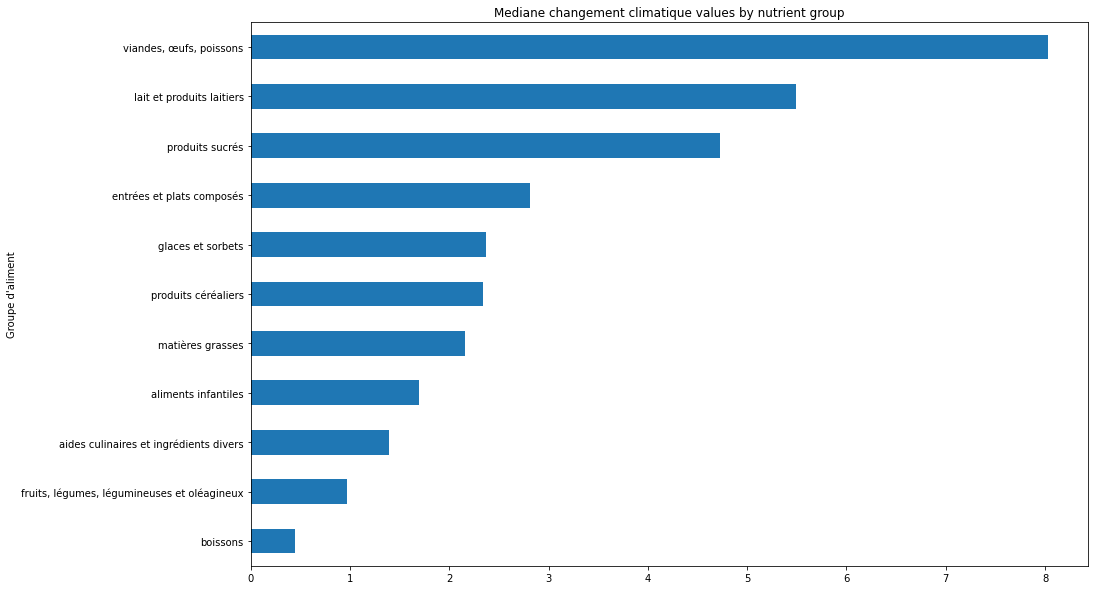

In [16]:
# Affichage de la valeur médiane du changement climatique par groupe d'aliment
c = 'Changement climatique (kg CO2 eq/kg de produit)'
result = data_synthese.groupby(["Groupe d'aliment"])[c].quantile(0.5)
_ = result.sort_values().plot(kind="barh", figsize=(15, 10), title="Mediane changement climatique values by nutrient group")

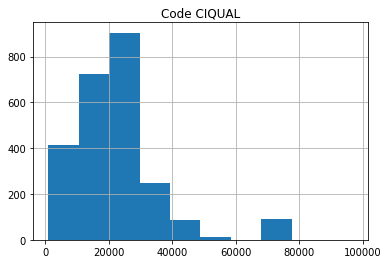

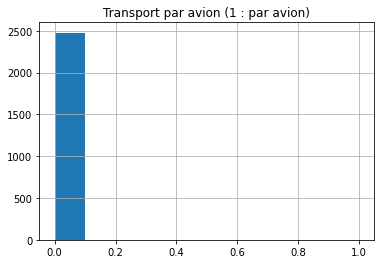

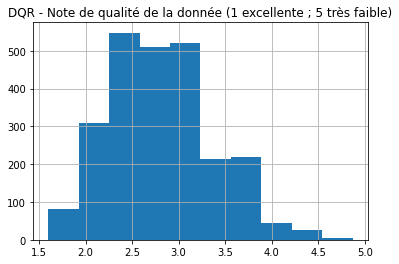

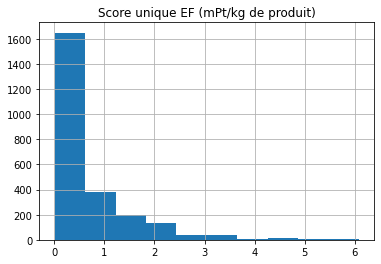

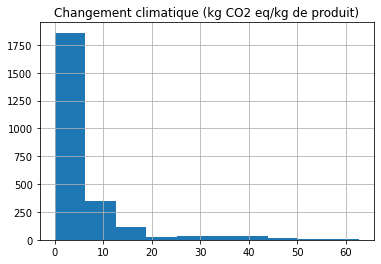

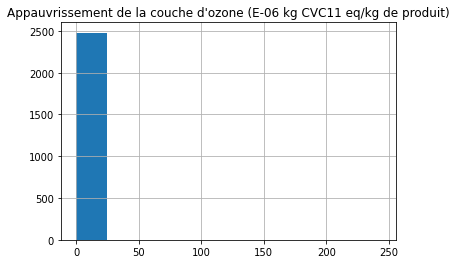

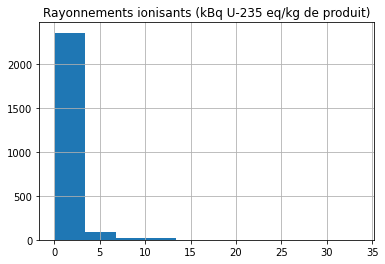

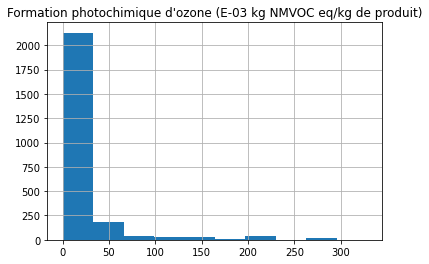

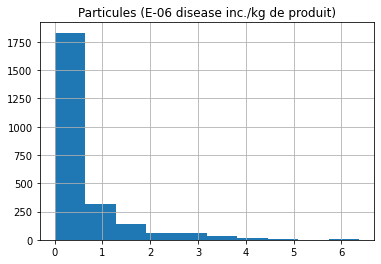

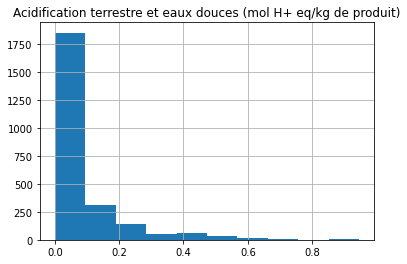

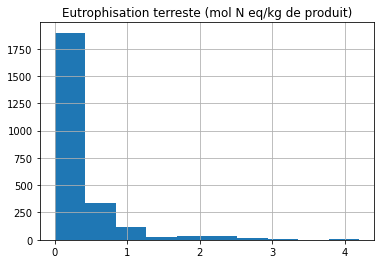

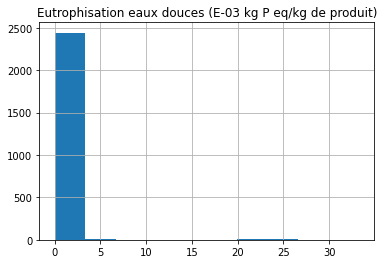

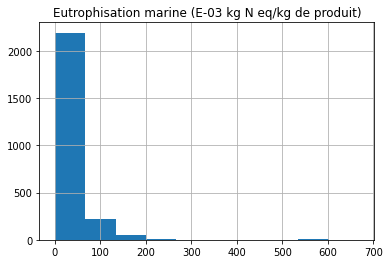

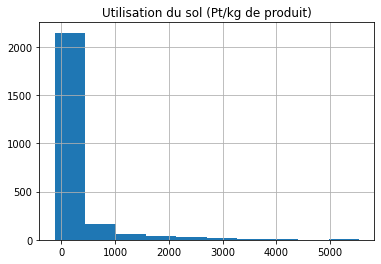

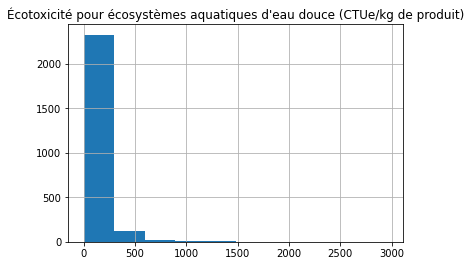

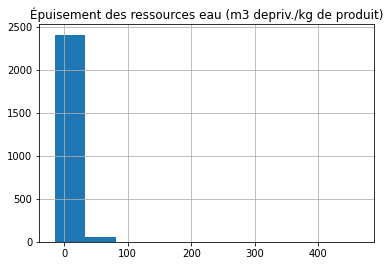

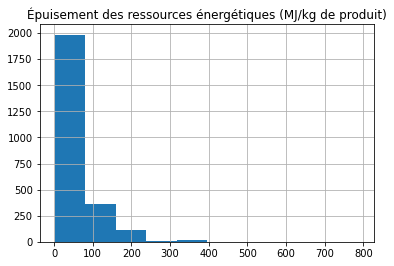

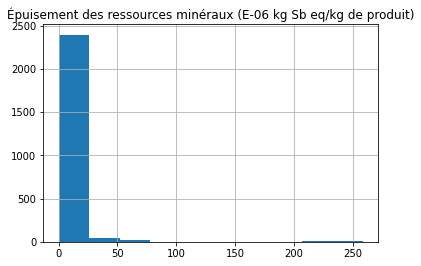

In [20]:
for column in data_synthese.columns:
    try: data_synthese.hist(column)
    except: pass

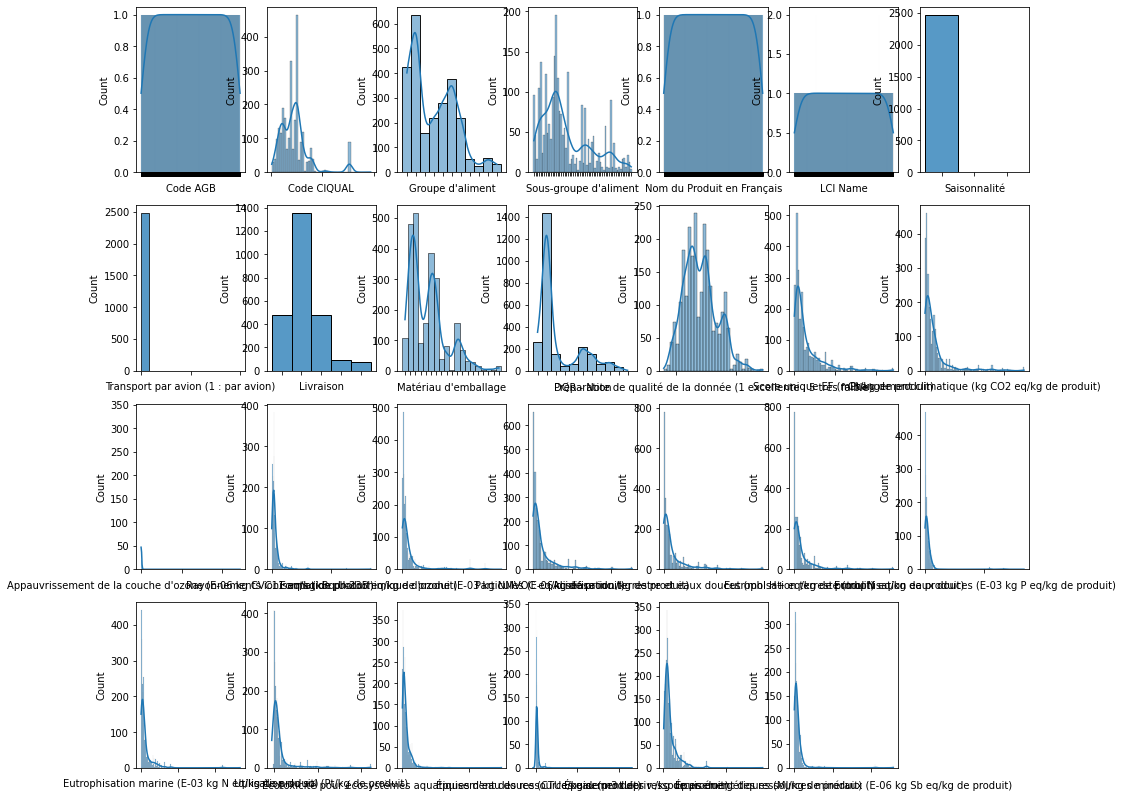

In [22]:
ut.viewData(data_synthese)

In [17]:
# Identify missing values of dataframe
data_synthese.isnull()

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,Saisonnalité,Transport par avion (1 : par avion),Livraison,Matériau d'emballage,...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2475,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2476,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2477,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Synthèse sur la partie exploration des données de la table synthese

<div class="alert alert-info" role="alert">
La table synthese résume l'effet de chacun des produits agricoles sur l'environnement. Les premières colonnes introduisent le produit en question (nom complet, code, groupe alimentaire, ..), tandis que les colonnes restantes indiquent l'impact sur l'environnement.
</div>

<div class="alert alert-success" role="alert">
Dans ce qui précède, nous avons exploré la table data_synthese de la base de données Agribalyse, nous allons résumer dans les points suivants les différentes méthodes et fonctions utilisées pour réaliser l'exploration :
<ul>
    <li>Affichage des variables de cette table</li>
    <li>Affichage des types de données</li>
    <li>Affichage des données sous forme de histogrammes afin de construire une idée sur la distribution et la dispersion des données dans la base de données</li>
    <li>Affichage d'une description de chaque attribut de la table data_synthese : moyenne, max, min, nombre de val distinctes, quartiles, médiane..</li>
</ul>


Nous avons également analysé chaque attribut de la base de données, et avons essayé de comprerndre le(s) liens qu'il peut avoir avec d'autres attributs de la base de données, et ceci afin de cibler la liste des attributs qui peuvent être intéressants à considérer comme étiquettes (labels) pour un problème de classification.

Pour cela nous pouvons considérer les problèmes d'apprentissage supervisé (de classification) suivants:
- un problème de classification multiclasse avec comme attribut label DQR.
- un problème de classification binaire avec comme attribut label Transport par avion.
- un problème de classification multiclasse avec comme attribut label Score unique.
- un problème de classification multiclasse avec comme attribut label Changement climatique (kg CO2 eq/kg de produit)
- un problème de classification multiclasse avec comme attribut label Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)
- un problème de classification multiclasse avec comme attribut label Rayonnements ionisants (kBq U-235 eq/kg de produit)
- un problème de classification multiclasse avec comme attribut label Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)
- un problème de classification multiclasse avec comme attribut label Particules (E-06 disease inc./kg de produit)
- un problème de classification multiclasse avec comme attribut label Acidification terrestre et eaux douces (mol H+ eq/kg de produit)
- un problème de classification binaire avec comme attribut label Eutrophisation (regroupant les deux colonnes Eutrophisation par le biais de la moyenne)
- un problème de classification multiclasse avec comme attribut label Eutrophisation eaux douces (E-03 kg P eq/kg de produit)
- un problème de classification multiclasse avec comme attribut label Eutrophisation marine (E-03 kg N eq/kg de produit)
 
***
Concernant les problèmes non supervisés, nous allons essayer de tourner l'algorithme de k-moyennes afin de trouver des relations ou groupes (clusters qui peuvent exister entre les données).
</div>

In [18]:
data_synthese['DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)'].sample(5)

2233    2.65
1035    3.06
1944    1.93
797     3.01
443     4.03
Name: DQR - Note de qualité de la donnée (1 excellente ; 5 très faible), dtype: float64

In [19]:
synthese_arr = np.array(data_synthese)
synthese_arr.shape

(2479, 27)

In [20]:
data_synthese['DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)'].describe()

count    2479.000000
mean        2.810097
std         0.542470
min         1.600000
25%         2.430000
50%         2.760000
75%         3.110000
max         4.870000
Name: DQR - Note de qualité de la donnée (1 excellente ; 5 très faible), dtype: float64

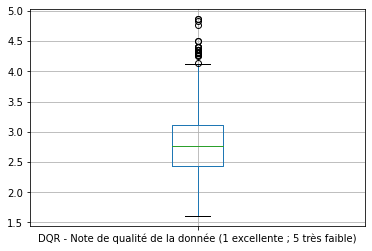

In [21]:
boxplot = data_synthese.boxplot(column=["DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)"])  

(array([ 81., 309., 548., 511., 522., 214., 219.,  44.,  27.,   4.]),
 array([1.6, 1.927, 2.254, 2.5810000000000004, 2.9080000000000004,
        3.2350000000000003, 3.5620000000000003, 3.8890000000000002, 4.216,
        4.543, 4.87], dtype=object),
 <BarContainer object of 10 artists>)

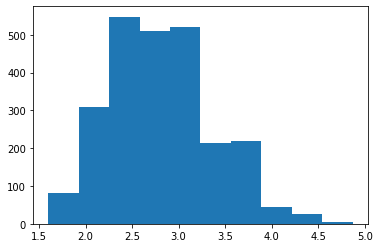

In [22]:
plt.hist(synthese_arr[:,11])

-------------

## 1.2 Pré-traitement de données (Data Cleaning)

<div class="alert alert-info" role="alert">
Dans cette partie nous allons appliquer des transformations sur les données afin de les rendre plus significatifs, et permettre l'entrainement de nos modèles sur ces données.
Les méthodes de transformation utilisées sont les suivantes:
    <ul>
        <li>Traitement des valeurs aberrantes.</li>
        <li>Traitement des valeurs nulles.</li>
        <li>Traitement des attributs catégoriels.</li>
        <li>Normalisation des données (transformer les données en une répartition centrée et réduite).</li>
    </ul>
</div>

In [93]:
def treat_outliers(d,c):
    '''
    Arguments: d - DataFrame
               c - chaine nom de colonne
    retourne dans d la colonne c sans valeurs aberrantes
    '''
    # IQR
    Q1 = np.percentile(d[c], 25,interpolation = 'midpoint')
    Q2 = np.percentile(d[c], 50,interpolation = 'midpoint')
    Q3 = np.percentile(d[c], 75,interpolation = 'midpoint')
    IQR = Q3 - Q1

    # Upper bound
    upper = np.where(d[c] >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(d[c] <= (Q1-1.5*IQR))

    d[c] = np.where(d[c] <(Q1-1.5*IQR), Q2,d[c])
    d[c] = np.where(d[c] >(Q3+1.5*IQR), Q2,d[c])

In [94]:
def train_cv(model, X, Y, niter=10):
    # Entrainement du modèle perceptron multiclasse avec l'algorithme k-ppv et k = 3
    index = np.random.permutation(len(X))
    Xm, Ym  = X[index], Y[index]
    niter = 10
    perf_train, perf_test = [], []
    tic= time.time()
    for i in range(niter):
        Xapp,Yapp,Xtest,Ytest = ut.crossval(Xm, Ym, niter, i)
        model.train(Xapp, Yapp)
        perf_train.append(round(model.accuracy(Xapp, Yapp),2))
        perf_test.append(round(model.accuracy(Xtest, Ytest),2))
        print("Kfold {} : train {}  -  test {}".format(i, perf_train[i], perf_test[i]))
    toc= time.time()
    print("---")
    print("Moyenne train set: {}".format(round(np.mean(perf_train),2)))
    print("Moyenne test  set: {}".format(round(np.mean(perf_test),2)))
    print(f"Résultat en {(toc-tic):.2} secondes")
    print("---")

### Etiquette : DQR

In [95]:
sc = StandardScaler()
d = data_synthese.copy()

# Supprimer les attributs non descriminats dans notre apprentisage
d.drop(['Code AGB', 'Code CIQUAL','Nom du Produit en Français','Saisonnalité','LCI Name'],inplace = True, axis = 1)

# Traiter les valeurs aberrantes
for c in d.columns:
    try: treat_outliers(d,c)
    except: continue

# Traiter l'attribut étiquette à part
d1 = d[d.columns.difference(['DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)'])]

# Normaliser les valeurs numériques
num_d = d1.select_dtypes(exclude=['object'])
d[num_d.columns] = sc.fit_transform(num_d)

# Discrétiser les variables catégorielles
d = pd.get_dummies(d)

C:\Users\PC\AppData\Local\Temp\ipykernel_18036\2479611173.py:8: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(d[c], 25,interpolation = 'midpoint')
C:\Users\PC\AppData\Local\Temp\ipykernel_18036\2479611173.py:9: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 = np.percentile(d[c], 50,interpolation = 'midpoint')
C:\Users\PC\AppData\Local\Temp\ipykernel_18036\2479611173.py:10: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encour

## 1.3 Entrainement des modèles

### Apprentissage supervisé - problème de classification

### Etiquette : DQR - Note de qualité de la donnée

In [103]:
X = np.array(d[d.columns.difference(['DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)'])])
Y = np.array(d['DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)'])

(array([ 33., 141., 356., 478., 408., 495., 176., 176., 170.,  46.]),
 array([1.6  , 1.852, 2.104, 2.356, 2.608, 2.86 , 3.112, 3.364, 3.616,
        3.868, 4.12 ]),
 <BarContainer object of 10 artists>)

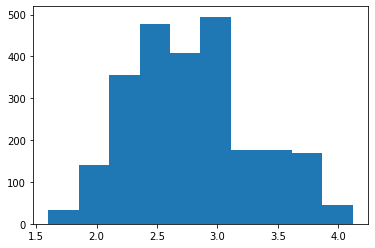

In [104]:
plt.hist(Y)

(array([ 128.,    0.,    0., 1565.,    0.,    0.,  750.,    0.,    0.,
          36.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

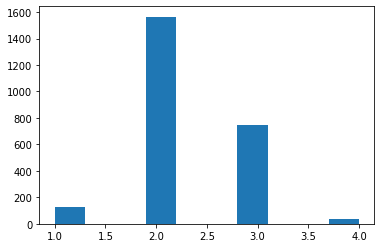

In [98]:
# Target 1 : DQR Qualité
'''
Y = np.where(Y<1,0,Y)
Y = np.where((Y>=1) & (Y<2),1,Y)
Y = np.where((Y>=2) & (Y<3),2,Y)
Y = np.where((Y>=3) & (Y<4),3,Y)
Y = np.where((Y>=4),4,Y)

plt.hist(Y)
'''s

C:\Users\PC\AppData\Local\Temp\ipykernel_18036\2885306287.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(Y, 20,interpolation = 'midpoint')
C:\Users\PC\AppData\Local\Temp\ipykernel_18036\2885306287.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 = np.percentile(Y, 40,interpolation = 'midpoint')
C:\Users\PC\AppData\Local\Temp\ipykernel_18036\2885306287.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to

(array([484.,   0., 456.,   0.,   0., 495.,  46., 502.,   0., 496.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

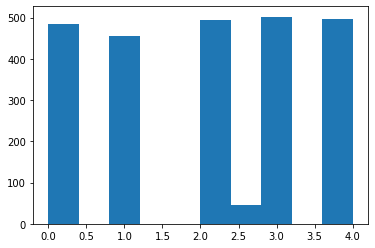

In [105]:
Q1 = np.percentile(Y, 20,interpolation = 'midpoint')
Q2 = np.percentile(Y, 40,interpolation = 'midpoint')
Q3 = np.percentile(Y, 60,interpolation = 'midpoint')
Q4 = np.percentile(Y, 80,interpolation = 'midpoint')

Y = np.where(Y<Q1,0,Y)
Y = np.where((Y>Q1) & (Y<Q2),1,Y)
Y = np.where((Y>Q2) & (Y<Q3),2,Y)
Y = np.where((Y>Q3) & (Y<Q4),3,Y)
Y = np.where((Y>Q4),4,Y)

plt.hist(Y)

In [107]:
div = int(0.75*len(X))
Xapp,Yapp = X[:div,:], Y[:div]
Xtest,Ytest = X[div:,:], Y[div:]
Xr = ut.PCA(X)
Xrapp, Xrtest = ut.PCA(Xapp), ut.PCA(Xtest)

le nombre de valeurs propres : 120
Dimension de l'ensemble de départ :  120
Dimension de l'ensemble après transformation :  2
---
le nombre de valeurs propres : 120
Dimension de l'ensemble de départ :  120
Dimension de l'ensemble après transformation :  2
---
le nombre de valeurs propres : 120
Dimension de l'ensemble de départ :  120
Dimension de l'ensemble après transformation :  2
---


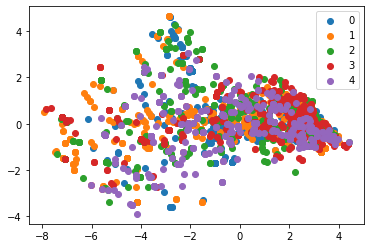

In [108]:
plt.figure()
plt.scatter(Xr[Y==0,0],Xr[Y==0,1])
plt.scatter(Xr[Y==1,0],Xr[Y==1,1])
plt.scatter(Xr[Y==2,0],Xr[Y==2,1])
plt.scatter(Xr[Y==3,0],Xr[Y==3,1])
plt.scatter(Xr[Y==4,0],Xr[Y==4,1])
# ####################################
plt.legend(np.arange(10))

In [109]:
X.shape

(2479, 120)

In [110]:
# Entrainement du modèle perceptron multiclasse avec l'algorithme k-ppv et k = 3
# Méthode d'évaluation : Validation croisée
modelKNN_MC = cl.ClassifierKNN_MC(120, 3, nb_class=5)
train_cv(modelKNN_MC, X,Y)

Kfold 0 : train 0.8  -  test 0.7
Kfold 1 : train 0.8  -  test 0.63
Kfold 2 : train 0.79  -  test 0.64
Kfold 3 : train 0.8  -  test 0.6
Kfold 4 : train 0.8  -  test 0.62
Kfold 5 : train 0.8  -  test 0.65
Kfold 6 : train 0.8  -  test 0.63
Kfold 7 : train 0.8  -  test 0.65
Kfold 8 : train 0.79  -  test 0.65
Kfold 9 : train 0.8  -  test 0.63
---
Moyenne train set: 0.8
Moyenne test  set: 0.64
Résultat en 7.9e+01 secondes
---


In [39]:
# Entrainement du modèle perceptron multiclasse avec l'algorithme k-ppv et k = 3
# Méthode d'évaluation : Validation croisée
modelKNN_MC = cl.ClassifierKNN_MC(120, 5, nb_class=5)
train_cv(modelKNN_MC, X,Y)

Kfold 0 : train 0.85  -  test 0.81
Kfold 1 : train 0.85  -  test 0.79
Kfold 2 : train 0.85  -  test 0.8
Kfold 3 : train 0.85  -  test 0.78
Kfold 4 : train 0.85  -  test 0.8
Kfold 5 : train 0.85  -  test 0.81
Kfold 6 : train 0.85  -  test 0.8
Kfold 7 : train 0.86  -  test 0.78
Kfold 8 : train 0.85  -  test 0.75
Kfold 9 : train 0.85  -  test 0.85
---
Moyenne train set: 0.85
Moyenne test  set: 0.8
Résultat en 4.6e+01 secondes
---


In [40]:
# Entrainement du modèle perceptron multiclasse
# Méthode d'évaluation : Validation croisée
learning_rate = 1e-2
input_dimension = 120
perceptron = cl.PerceptronMultiOOA(input_dimension, learning_rate, nbC=5, init=0)
train_cv(perceptron, X,Y)

Kfold 0 : train 0.76  -  test 0.77
Kfold 1 : train 0.75  -  test 0.68
Kfold 2 : train 0.68  -  test 0.65
Kfold 3 : train 0.73  -  test 0.72
Kfold 4 : train 0.69  -  test 0.66
Kfold 5 : train 0.67  -  test 0.6
Kfold 6 : train 0.74  -  test 0.73
Kfold 7 : train 0.77  -  test 0.79
Kfold 8 : train 0.75  -  test 0.71
Kfold 9 : train 0.7  -  test 0.64
---
Moyenne train set: 0.72
Moyenne test  set: 0.7
Résultat en 3.1e+01 secondes
---


In [42]:
# Sans utilisation de la procédure de cross validation
# Entrainement du modèle sur le train_set, et évaluation sur le test_set

# Création d'un perceptron avec initialisation à 0 et le learning_rate ci-dessous:
learning_rate = 0.01
input_dimension = 120
perceptron = cl.PerceptronMultiOOA(input_dimension, learning_rate, nbC=5, init=0)
tic = time.time()
# Entrainement du modèle
perceptron.train(Xapp, Yapp)
toc = time.time()
print("---")
print("Précision train set : ", round(perceptron.accuracy(Xapp, Yapp),2)*100,"%")
print("Précision test set : ", round(perceptron.accuracy(Xtest, Ytest),2)*100,"%")
print(f"Résultat en {(toc-tic):.4} secondes")

---
Précision train set :  70.0 %
Précision test set :  73.0 %
Résultat en 6.48 secondes


In [22]:
# De même, les classes de Classifiers sont utilisables en mettant classif. devant leur nom:
# Création d'un perceptron
arbre_1 = cl.ClassifierArbreNumerique(120, 0.30)

# Construction de l'arbre de décision à partir du dataset généré plus haut
arbre_1.train(Xapp,Yapp)
print("Accuracy (train): ", round(arbre_1.accuracy(Xapp,Yapp),2)*100)
print("Accuracy (test): ", round(arbre_1.accuracy(Xtest,Ytest),2)*100)

# Construction de la représentation graphique (affichage)
graphe_arbre_1 = gv.Digraph(format='png')
arbre_1.affiche(graphe_arbre_1)

# Affichage du graphe obtenu:
# graphe_arbre_2

Accuracy (train):  93.0
Accuracy (test):  72.0


<div class="alert alert-info" role="alert">
 Ce que nous avons réalisé jusque là avec comme étiquette DQR - Note de qualité de la donnée (1 excellente ; 5 très faible):
    <ul>
    <li>Division des valeurs de l'attribut DQR afin de construire des classes de prédiction (05 classes).</li>
    <li>Application de l'algorithme k-ppv avec comme valeur de k = 3.</li>
    <li>Application de l'algorithme du perceptron.</li>
    <li>Application de l'algorithme d'arbre de décision.</li>
    <li>Application de l'algorithme de forêt aleatoire.</li>
    </ul>
</div>

<div class="alert alert-success" role="alert">
  Analyse des résultats:
    L'algorithme de k-ppv donne nettement de meilleurs résultats que les deux autres algorithmes utilisés.
</div>

### Etiquette :  Score Unique

Construction de classe pour un problème de classification binaire (division par la médiane)

In [54]:
sc = StandardScaler()
d = data_synthese.copy()
# get numeric data
#um_d = d.select_dtypes(exclude=['object'])
cols = d.columns

# Supprimer les attributs non descriminats dans notre apprentisage
d.drop(['Code AGB', 'Code CIQUAL','Nom du Produit en Français','Saisonnalité','LCI Name'],inplace = True, axis = 1)

for c in d.columns:
    try: treat_outliers(d,c)
    except: continue

c = ['Score unique EF (mPt/kg de produit)']
d1 = d[d.columns.difference(c)]
num_d = d1.select_dtypes(exclude=['object'])
# update the cols with their normalized values
d[num_d.columns] = sc.fit_transform(num_d)
d = pd.get_dummies(d)

C:\Users\PC\AppData\Local\Temp\ipykernel_18036\2479611173.py:8: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(d[c], 25,interpolation = 'midpoint')
C:\Users\PC\AppData\Local\Temp\ipykernel_18036\2479611173.py:9: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 = np.percentile(d[c], 50,interpolation = 'midpoint')
C:\Users\PC\AppData\Local\Temp\ipykernel_18036\2479611173.py:10: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encour

(array([723., 505., 591., 119., 184.,  70.,  97.,  65.,  46.,  79.]),
 array([0.00613024, 0.19527024, 0.38441023, 0.57355023, 0.76269022,
        0.95183022, 1.14097022, 1.33011021, 1.51925021, 1.7083902 ,
        1.8975302 ]),
 <BarContainer object of 10 artists>)

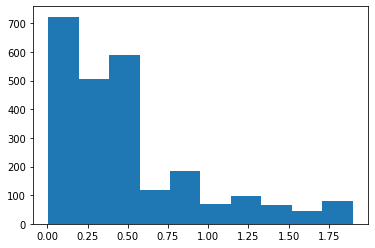

In [55]:
c2 = ['Score unique EF (mPt/kg de produit)']
X2 = np.array(d[d.columns.difference(c2)])
Y2 = np.array(d[c2])
plt.hist(Y2)

C:\Users\PC\AppData\Local\Temp\ipykernel_18036\3499253807.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 = np.percentile(Y2, 50,interpolation = 'midpoint')


(array([1239.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1240.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

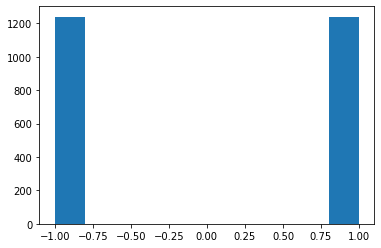

In [56]:
Q2 = np.percentile(Y2, 50,interpolation = 'midpoint')
Y2 = np.where(Y2<Q2,-1,1)
plt.hist(Y2)

In [58]:
div = int(0.75*len(X2))
X2app,Y2app = X2[:div,:], Y2[:div]
X2test,Y2test = X2[div:,:], Y2[div:]
X2rapp, X2rtest = ut.PCA(Xapp), ut.PCA(Xtest)

le nombre de valeurs propres : 120
Dimension de l'ensemble de départ :  120
Dimension de l'ensemble après transformation :  2
---
le nombre de valeurs propres : 120
Dimension de l'ensemble de départ :  120
Dimension de l'ensemble après transformation :  2
---


In [47]:
# Entrainement du modèle perceptron multiclasse avec l'algorithme k-ppv et k = 3
modelKNN = cl.ClassifierKNN(120, 3)
train_cv(modelKNN,X2,Y2)

Kfold 0 : train 0.99  -  test 0.97
Kfold 1 : train 0.99  -  test 0.97
Kfold 2 : train 0.99  -  test 0.97
Kfold 3 : train 0.99  -  test 0.98
Kfold 4 : train 0.99  -  test 0.98
Kfold 5 : train 0.99  -  test 0.98
Kfold 6 : train 0.99  -  test 0.98
Kfold 7 : train 0.99  -  test 0.99
Kfold 8 : train 0.99  -  test 0.97
Kfold 9 : train 0.99  -  test 0.96
---
Moyenne train set: 0.99
Moyenne test  set: 0.98
Résultat en 1.5e+02 secondes
---


In [49]:
# Sans utilisation de la procédure de cross validation
# Entrainement du modèle sur le train_set, et évaluation sur le test_set

# Création d'un perceptron avec initialisation à 0 et le learning_rate ci-dessous:
learning_rate = 0.1
input_dimension = 120
perceptron = cl.ClassifierPerceptron(input_dimension, learning_rate)
tic = time.time()
# Entrainement du modèle
perceptron.train(X2, Y2)
toc = time.time()
print("---")
print("Précision train set : ", round(perceptron.accuracy(X2, Y2),2)*100,"%")
print(f"Résultat en {(toc-tic):.4} secondes")

---
Précision train set :  97.0 %
Résultat en 1.828 secondes


In [51]:
# Entrainement du modèle perceptron multiclasse
learning_rate = 0.01
input_dimension = 120
perceptron = cl.ClassifierPerceptron(input_dimension, learning_rate)
train_cv(perceptron,X2,Y2)

Kfold 0 : train 0.98  -  test 0.98
Kfold 1 : train 0.98  -  test 0.97
Kfold 2 : train 0.99  -  test 0.99
Kfold 3 : train 0.98  -  test 0.98
Kfold 4 : train 0.98  -  test 0.97
Kfold 5 : train 0.98  -  test 0.96
Kfold 6 : train 0.97  -  test 0.96
Kfold 7 : train 0.99  -  test 0.97
Kfold 8 : train 0.99  -  test 0.97
Kfold 9 : train 0.98  -  test 0.97
---
Moyenne train set: 0.98
Moyenne test  set: 0.97
Résultat en 1.4e+01 secondes
---


In [61]:
# De même, les classes de Classifiers sont utilisables en mettant classif. devant leur nom:
# Création d'un perceptron
arbre_2 = cl.ClassifierArbreNumerique(120, 0.30)

# Construction de l'arbre de décision à partir du dataset généré plus haut
arbre_2.train(X2app,Y2app)
print("Accuracy (train): ", round(arbre_2.accuracy(X2app,Y2app),2)*100)
print("Accuracy (test): ", round(arbre_2.accuracy(X2test,Y2test),2)*100)

# Construction de la représentation graphique (affichage)
graphe_arbre_2 = gv.Digraph(format='png')
arbre_2.affiche(graphe_arbre_2)

# Affichage du graphe obtenu:
# graphe_arbre_2

Accuracy (train):  97.0
Accuracy (test):  94.0


In [63]:
# Entrainement du modèle forêt aléatoire
# Méthode d'évaluation : Entrainement du modèle sur le train_set, et évaluation sur le test_set
random.seed(42)

foret_1 = cl.ClassifierBaggingTree(5,0.3,0.0,True)
foret_1.train((X2app,Y2app))

# Accuracy
print("Précision train set:",round(foret_1.accuracy(X2app,Y2app),2))
print("Précision test set:",round(foret_1.accuracy(X2test,Y2test),2))

Précision train set: 0.99
Précision test set: 0.96


In [77]:
# Entrainement du modèle forêt aléatoire
# Méthode d'évaluation : Entrainement du modèle sur le train_set, et évaluation sur le test_set
random.seed(42)

foret_1 = cl.ClassifierBaggingTree(5,0.3,0.0,True)
foret_1.train((X2rapp,Y2app))

# Accuracy
print("Précision train set:",round(foret_1.accuracy(X2rapp,Y2app),2))
print("Précision test set:",round(foret_1.accuracy(X2rtest,Y2test),2))

Précision train set: 0.98
Précision test set: 0.95


C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\contour.py:1503: ComplexWarning: Casting complex values to real discards the imaginary part
  x = np.asarray(x, dtype=np.float64)
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\contour.py:1504: ComplexWarning: Casting complex values to real discards the imaginary part
  y = np.asarray(y, dtype=np.float64)


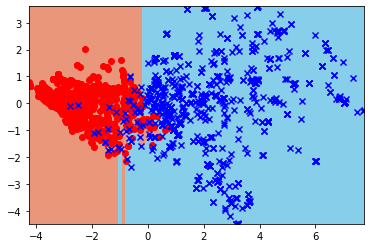

In [78]:
# Affichage de la frontière de séparation des classes
ut.plot_frontiere(X2rapp,np.reshape(Yapp, (len(Yapp))),foret_1,step=100)
ut.plot2DSet(X2rapp,np.reshape(Yapp, (len(Yapp))))

<div class="alert alert-info" role="alert">
 Ce que nous avons réalisé jusque là avec comme étiquette Score Unique :
    <ul>
    <li>Division des valeurs de l'attribut Score afin de construire des classes de prédiction (02 classes).</li>
    <li>Application de l'algorithme k-ppv avec comme valeur de k = 3.</li>
    <li>Application de l'algorithme du perceptron (avec cross-validation et avec train set evaluation.</li>
    <li>Application de l'algorithme d'arbre de décision.</li>
    <li>Application de l'algorithme de forêt aleatoire.</li>
    </ul>
</div>

<div class="alert alert-success" role="alert">
  Analyse des résultats:
    Tout les algorithmes utilisés donnent des taux de bonnes prédictions très élevés.
</div>

### Etiquette : Eutrophisation

Construction de classes en combinant deux attributs (Eutrophisation eaux douces, Eutrophisation marine) par la moyenne, problème de classification binaire (divisé sur la médiane).

In [53]:
sc = StandardScaler()
d = data_synthese.copy()
# get numeric data
#um_d = d.select_dtypes(exclude=['object'])
cols = d.columns
#d[cols] = d[cols].apply(pd.to_numeric, errors='coerce')

# Supprimer les attributs non descriminats dans notre apprentisage
d.drop(['Code AGB', 'Code CIQUAL','Nom du Produit en Français','Saisonnalité','LCI Name'],inplace = True, axis = 1)

for c in d.columns:
    try: treat_outliers(d,c)
    except: continue
        
c = ['Eutrophisation eaux douces (E-03 kg P eq/kg de produit)','Eutrophisation marine (E-03 kg N eq/kg de produit)']
d1 = d[d.columns.difference(c)]
num_d = d1.select_dtypes(exclude=['object'])
# update the cols with their normalized values
d[num_d.columns] = sc.fit_transform(num_d)
d = pd.get_dummies(d)

C:\Users\PC\AppData\Local\Temp\ipykernel_15176\2479611173.py:8: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(d[c], 25,interpolation = 'midpoint')
C:\Users\PC\AppData\Local\Temp\ipykernel_15176\2479611173.py:9: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 = np.percentile(d[c], 50,interpolation = 'midpoint')
C:\Users\PC\AppData\Local\Temp\ipykernel_15176\2479611173.py:10: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encour

(array([762., 411., 684., 199., 164.,  70.,  60.,  50.,  40.,  39.]),
 array([1.92458147e-02, 3.22786125e+00, 6.43647669e+00, 9.64509213e+00,
        1.28537076e+01, 1.60623230e+01, 1.92709384e+01, 2.24795539e+01,
        2.56881693e+01, 2.88967848e+01, 3.21054002e+01]),
 <BarContainer object of 10 artists>)

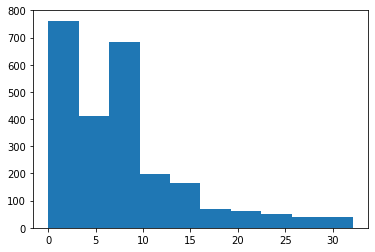

In [54]:
X3 = np.array(d[d.columns.difference(c)])
Y3 = np.mean(np.array(d[c]),axis=1)
plt.hist(Y3)

In [55]:
X3.shape

(2479, 119)

C:\Users\PC\AppData\Local\Temp\ipykernel_15176\2127168690.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 = np.percentile(Y3, 50,interpolation = 'midpoint')


(array([1229.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1250.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

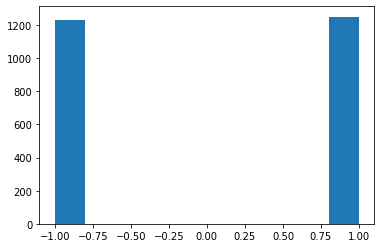

In [56]:
Q2 = np.percentile(Y3, 50,interpolation = 'midpoint')
Y3 = np.where(Y3<Q2,-1,1)
plt.hist(Y3)

In [57]:
# Entrainement du modèle perceptron multiclasse avec l'algorithme k-ppv et k = 3
modelKNN = cl.ClassifierKNN(119, 3)
train_cv(modelKNN,X3,Y3)

Kfold 0 : train 0.98  -  test 0.94
Kfold 1 : train 0.98  -  test 0.96
Kfold 2 : train 0.98  -  test 0.99
Kfold 3 : train 0.99  -  test 0.96
Kfold 4 : train 0.99  -  test 0.97
Kfold 5 : train 0.98  -  test 0.98
Kfold 6 : train 0.98  -  test 0.95
Kfold 7 : train 0.99  -  test 0.97
Kfold 8 : train 0.98  -  test 0.97
Kfold 9 : train 0.98  -  test 0.98
---
Moyenne train set: 0.98
Moyenne test  set: 0.97
Résultat en 1.5e+02 secondes
---


In [58]:
# Entrainement du modèle perceptron multiclasse
learning_rate = 0.01
input_dimension = 119
perceptron = cl.ClassifierPerceptron(input_dimension, learning_rate)
train_cv(perceptron,X3,Y3)

Kfold 0 : train 0.95  -  test 0.94
Kfold 1 : train 0.94  -  test 0.92
Kfold 2 : train 0.95  -  test 0.93
Kfold 3 : train 0.92  -  test 0.94
Kfold 4 : train 0.94  -  test 0.93
Kfold 5 : train 0.93  -  test 0.9
Kfold 6 : train 0.94  -  test 0.93
Kfold 7 : train 0.95  -  test 0.94
Kfold 8 : train 0.95  -  test 0.94
Kfold 9 : train 0.94  -  test 0.94
---
Moyenne train set: 0.94
Moyenne test  set: 0.93
Résultat en 6.3 secondes
---


In [59]:
# De même, les classes de Classifiers sont utilisables en mettant classif. devant leur nom:
# Création d'un perceptron
arbre_2 = cl.ClassifierArbreNumerique(119, 0.30)

# Construction de l'arbre de décision à partir du dataset généré plus haut
arbre_2.train(X3,Y3)
print("Accuracy (train): ", round(arbre_2.accuracy(X3,Y3),2)*100)

# Construction de la représentation graphique (affichage)
graphe_arbre_2 = gv.Digraph(format='png')
arbre_2.affiche(graphe_arbre_2)

# Affichage du graphe obtenu:
# graphe_arbre_2

Accuracy (train):  91.0


### Etiquette : Changement climatique

In [60]:
d.columns

Index(['Transport par avion (1 : par avion)',
       'DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)',
       'Score unique EF (mPt/kg de produit)',
       'Changement climatique (kg CO2 eq/kg de produit)',
       'Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)',
       'Rayonnements ionisants (kBq U-235 eq/kg de produit)',
       'Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)',
       'Particules (E-06 disease inc./kg de produit)',
       'Acidification terrestre et eaux douces (mol H+ eq/kg de produit)',
       'Eutrophisation terreste (mol N eq/kg de produit)',
       ...
       'Préparation_Cuisson à l'eau', 'Préparation_Four', 'Préparation_Four ',
       'Préparation_Friture', 'Préparation_Micro onde',
       'Préparation_Micro onde ', 'Préparation_Pas de préparation',
       'Préparation_Pas de préparation ', 'Préparation_Poêle',
       'Préparation_Réfrigéré chez le consommateur'],
      dtype='object', length=121)

In [61]:
sc = StandardScaler()
d = data_synthese.copy()
# get numeric data
#um_d = d.select_dtypes(exclude=['object'])
cols = d.columns

# Supprimer les attributs non descriminats dans notre apprentisage
d.drop(['Code AGB', 'Code CIQUAL','Nom du Produit en Français','Saisonnalité','LCI Name'],inplace = True, axis = 1)

for c in d.columns:
    try: treat_outliers(d,c)
    except: continue

c = ['Changement climatique (kg CO2 eq/kg de produit)']
d1 = d[d.columns.difference(c)]
num_d = d1.select_dtypes(exclude=['object'])
# update the cols with their normalized values
d[num_d.columns] = sc.fit_transform(num_d)
d = pd.get_dummies(d)

C:\Users\PC\AppData\Local\Temp\ipykernel_15176\2479611173.py:8: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(d[c], 25,interpolation = 'midpoint')
C:\Users\PC\AppData\Local\Temp\ipykernel_15176\2479611173.py:9: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 = np.percentile(d[c], 50,interpolation = 'midpoint')
C:\Users\PC\AppData\Local\Temp\ipykernel_15176\2479611173.py:10: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encour

(array([784., 706., 232., 259., 205., 112.,  71.,  43.,  25.,  42.]),
 array([ 0.02104661,  1.41172095,  2.80239529,  4.19306963,  5.58374397,
         6.97441831,  8.36509264,  9.75576698, 11.14644132, 12.53711566,
        13.92779   ]),
 <BarContainer object of 10 artists>)

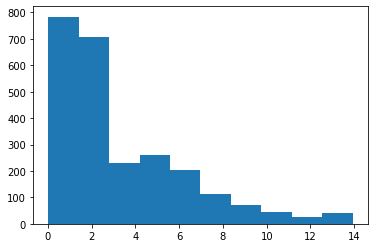

In [62]:
X4 = np.array(d[d.columns.difference(c)])
Y4 = np.mean(np.array(d[c]),axis=1)
plt.hist(Y4)

C:\Users\PC\AppData\Local\Temp\ipykernel_15176\1564911575.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(Y4, 20,interpolation = 'midpoint')
C:\Users\PC\AppData\Local\Temp\ipykernel_15176\1564911575.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 = np.percentile(Y4, 40,interpolation = 'midpoint')
C:\Users\PC\AppData\Local\Temp\ipykernel_15176\1564911575.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged 

(array([496.,   0., 492.,   0.,   7., 492.,   0., 496.,   0., 496.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

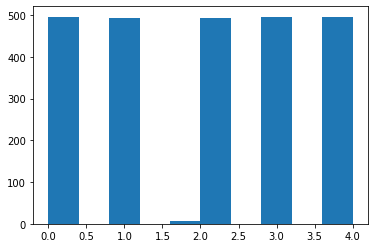

In [63]:
Q1 = np.percentile(Y4, 20,interpolation = 'midpoint')
Q2 = np.percentile(Y4, 40,interpolation = 'midpoint')
Q3 = np.percentile(Y4, 60,interpolation = 'midpoint')
Q4 = np.percentile(Y4, 80,interpolation = 'midpoint')

Y4 = np.where(Y4<Q1,0,Y4)
Y4 = np.where((Y4>Q1) & (Y4<Q2),1,Y4)
Y4 = np.where((Y4>Q2) & (Y4<Q3),2,Y4)
Y4 = np.where((Y4>Q3) & (Y4<Q4),3,Y4)
Y4 = np.where((Y4>Q4),4,Y4)

plt.hist(Y4)

In [64]:
X4.shape

(2479, 120)

In [65]:
# Entrainement du modèle perceptron multiclasse avec l'algorithme k-ppv et k = 3
# Méthode d'évaluation : Validation croisée
modelKNN_MC = cl.ClassifierKNN_MC(120, 3, nb_class=5)
train_cv(modelKNN_MC, X4,Y4)

Kfold 0 : train 0.92  -  test 0.86
Kfold 1 : train 0.92  -  test 0.84
Kfold 2 : train 0.93  -  test 0.87
Kfold 3 : train 0.92  -  test 0.82
Kfold 4 : train 0.93  -  test 0.87
Kfold 5 : train 0.92  -  test 0.85
Kfold 6 : train 0.93  -  test 0.89
Kfold 7 : train 0.93  -  test 0.86
Kfold 8 : train 0.92  -  test 0.83
Kfold 9 : train 0.92  -  test 0.87
---
Moyenne train set: 0.92
Moyenne test  set: 0.86
Résultat en 4.5e+01 secondes
---


In [66]:
# Entrainement du modèle perceptron multiclasse avec l'algorithme k-ppv et k = 3
# Méthode d'évaluation : Validation croisée
learning_rate = 1e-2
input_dimension = 120
perceptron = cl.PerceptronMultiOOA(input_dimension, learning_rate, nbC=5, init=0)
train_cv(perceptron, X4,Y4)

Kfold 0 : train 0.74  -  test 0.69
Kfold 1 : train 0.71  -  test 0.72
Kfold 2 : train 0.76  -  test 0.7
Kfold 3 : train 0.73  -  test 0.69
Kfold 4 : train 0.76  -  test 0.74
Kfold 5 : train 0.72  -  test 0.65
Kfold 6 : train 0.67  -  test 0.64
Kfold 7 : train 0.75  -  test 0.7
Kfold 8 : train 0.71  -  test 0.7
Kfold 9 : train 0.74  -  test 0.72
---
Moyenne train set: 0.73
Moyenne test  set: 0.7
Résultat en 3.5e+01 secondes
---


Accuracy (train):  98.0
Accuracy (test):  78.0


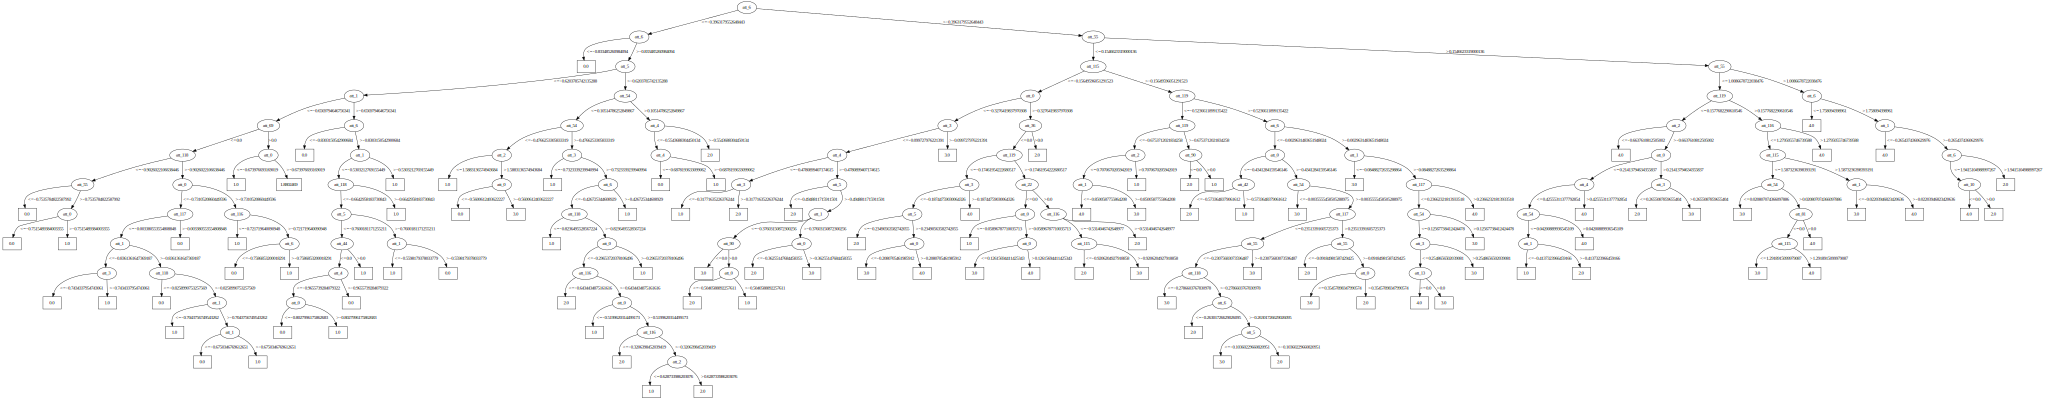

In [67]:
# De même, les classes de Classifiers sont utilisables en mettant classif. devant leur nom:
# Création d'un perceptron
arbre_2 = cl.ClassifierArbreNumerique(120, 0.30)

div = int(0.75*len(X4))
Xapp,Yapp = X4[:div,:], Y4[:div]
Xtest,Ytest = X4[div:,:], Y4[div:]
# Construction de l'arbre de décision à partir du dataset généré plus haut
arbre_2.train(Xapp,Yapp)
print("Accuracy (train): ", round(arbre_2.accuracy(Xapp,Yapp),2)*100)
print("Accuracy (test): ", round(arbre_2.accuracy(Xtest,Ytest),2)*100)

# Construction de la représentation graphique (affichage)
graphe_arbre_2 = gv.Digraph(format='png')
arbre_2.affiche(graphe_arbre_2)

# Affichage du graphe obtenu:
graphe_arbre_2

***

## Apprentissage non supervisé

### Clustering hiérarchique

In [5]:
sc = StandardScaler()
d = data_synthese.copy()
# get numeric data
#um_d = d.select_dtypes(exclude=['object'])
cols = d.columns
d[cols] = d[cols].apply(pd.to_numeric, errors='coerce')

# Supprimer les attributs non descriminats dans notre apprentisage
d.drop(['Code AGB', 'Code CIQUAL','Nom du Produit en Français','Saisonnalité','LCI Name'],inplace = True, axis = 1)

for c in d.columns:
    try: treat_outliers(d,c)
    except: continue
        
num_d = d.select_dtypes(exclude=['object'])
# update the cols with their normalized values
d[num_d.columns] = sc.fit_transform(num_d)
d = pd.get_dummies(d)
d[num_d.columns] = d[num_d.columns].fillna(0)

C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


le nombre de valeurs propres : 121
Dimension de l'ensemble de départ :  121
Dimension de l'ensemble après transformation :  2
---


C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


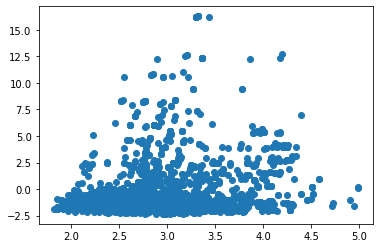

In [23]:
# Réduction de la dimensionnalité de la base d'apprentissage en utilisant PCA
Xr = ut.PCA(np.array(d))
data_2D = pd.DataFrame(Xr)
data_2D.columns = ['X','Y']
plt.scatter(data_2D["X"], data_2D["Y"])

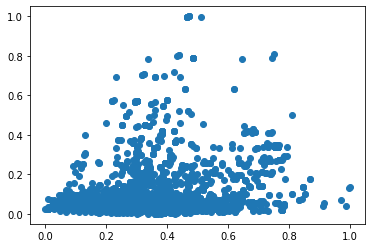

In [24]:
# Normalisation des données
data_2D_norm =  clust.normalisation(data_2D)
plt.scatter(data_2D_norm["X"], data_2D_norm["Y"])

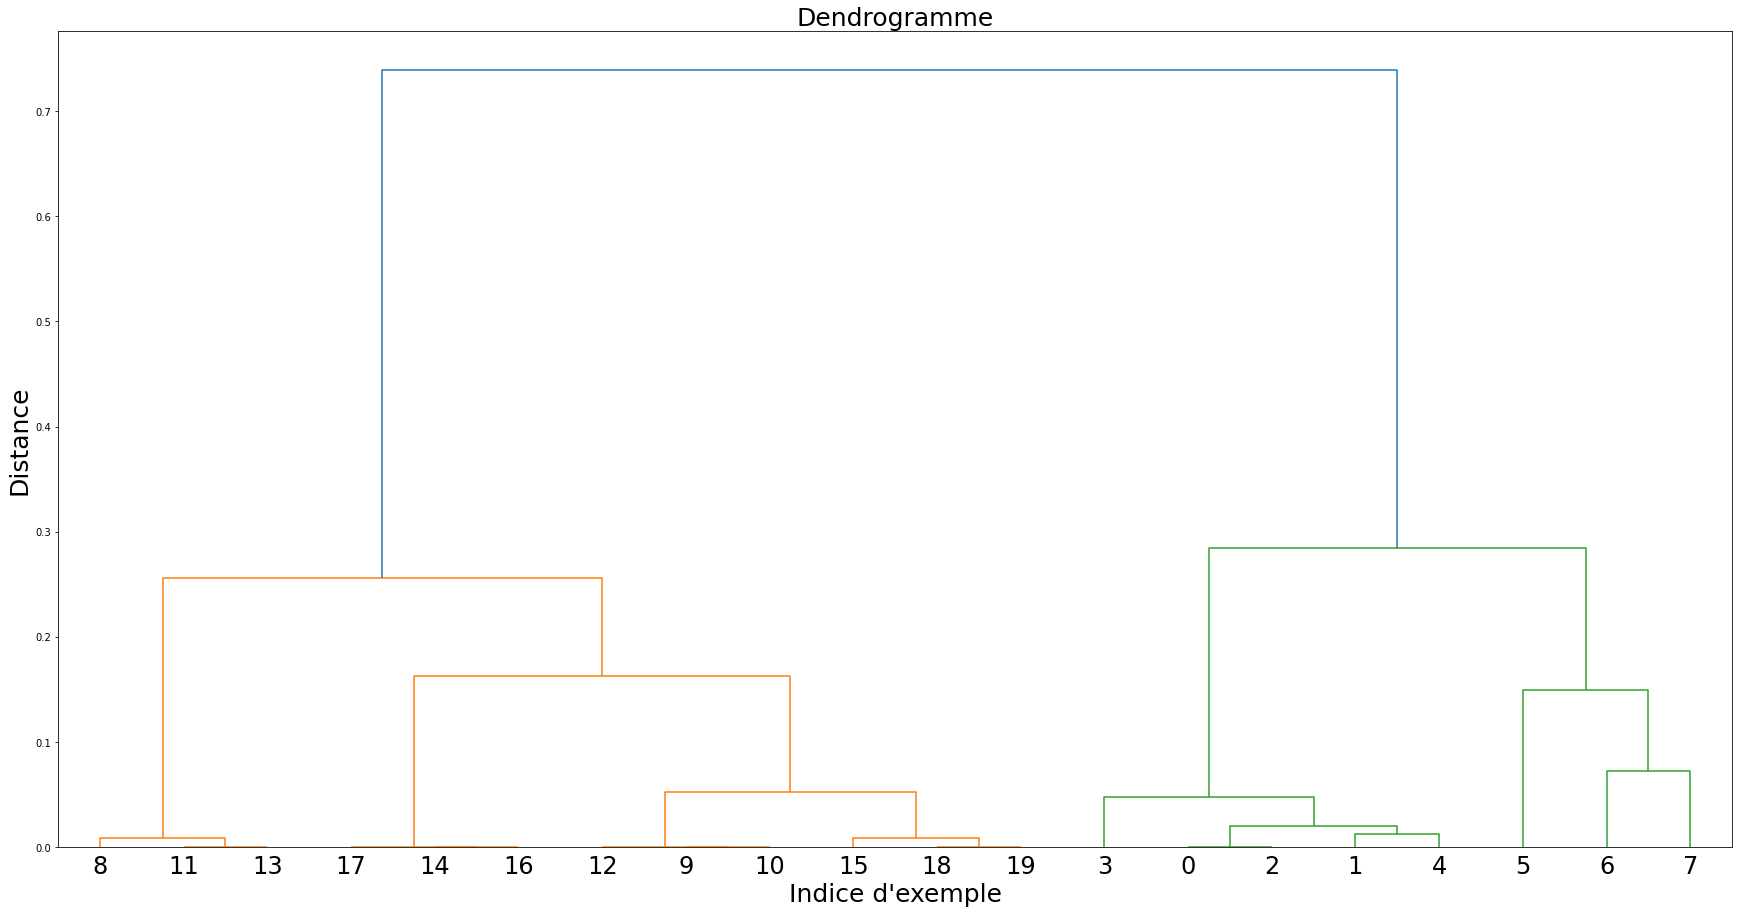

[[0, 2, 0.0, 2],
 [9, 10, 0.0, 2],
 [11, 13, 0.0, 2],
 [12, 21, 0.0, 3],
 [14, 16, 0.0, 2],
 [17, 24, 0.0, 3],
 [18, 19, 0.0, 2],
 [15, 26, 0.008386272174085989, 3],
 [8, 22, 0.00838627313571621, 3],
 [1, 4, 0.011779509093845432, 2],
 [20, 29, 0.01994038413021432, 4],
 [3, 30, 0.04728548408741279, 5],
 [23, 27, 0.052001839886563664, 6],
 [6, 7, 0.07176522363512407, 2],
 [5, 33, 0.14882291716106344, 3],
 [25, 32, 0.16244156133280768, 9],
 [28, 35, 0.25548787315891275, 12],
 [31, 34, 0.2839314527769457, 8],
 [36, 37, 0.7391124020917743, 20]]

In [34]:
# L'application sur nos données:
clust.clustering_hierarchique(data_2D_norm.iloc[:20,:],False,True)

## Algorithme de k moyennes

In [35]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

les_centres, l_affectation = clust.kmoyennes(2, data_2D_norm, 0.05, 100)

print("Affichage des centres: ",les_centres)

Iteration 1 Inertie : 85.0661 Difference : 3.4686
Iteration 2 Inertie : 82.6546 Difference : 2.4116
Iteration 3 Inertie : 79.4055 Difference : 3.249
Iteration 4 Inertie : 76.3387 Difference : 3.0668
Iteration 5 Inertie : 75.1531 Difference : 1.1856
Iteration 6 Inertie : 74.8431 Difference : 0.31
Iteration 7 Inertie : 74.7611 Difference : 0.082
Iteration 8 Inertie : 74.7536 Difference : 0.0075
Affichage des centres:  [[0.28074125+0.j 0.06942811+0.j]
 [0.55561132+0.j 0.22798844+0.j]]


C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


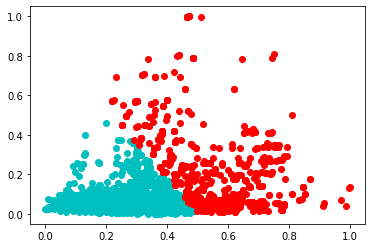

In [36]:
clust.affiche_resultat(data_2D_norm,les_centres,l_affectation)

In [79]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

les_centres, l_affectation = clust.kmoyennes(3, data_2D_norm, 0.05, 100)

print("Affichage des centres: ",les_centres)

print("---")
print("Dunn index : ", clust.dunn_index(les_centres))

NameError: name 'data_2D_norm' is not defined

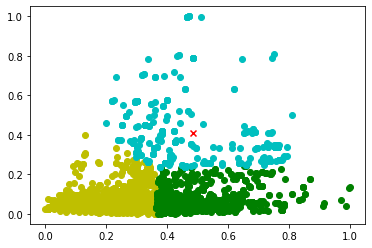

In [42]:
clust.affiche_resultat(data_2D_norm,les_centres,l_affectation)

Iteration 1 Inertie : 36.9452 Difference : 9.2438
Iteration 2 Inertie : 32.1447 Difference : 4.8004
Iteration 3 Inertie : 30.5958 Difference : 1.5489
Iteration 4 Inertie : 29.7411 Difference : 0.8548
Iteration 5 Inertie : 29.4193 Difference : 0.3218
Iteration 6 Inertie : 29.2174 Difference : 0.2019
Iteration 7 Inertie : 29.2018 Difference : 0.0156
Affichage des centres:  [[0.12905543+0.j 0.06703102+0.j]
 [0.45039352+0.j 0.06779773+0.j]
 [0.36959244+0.j 0.49438431+0.j]
 [0.28873112+0.j 0.07773844+0.j]
 [0.69776585+0.j 0.19093372+0.j]]
Dunn index :  0.04


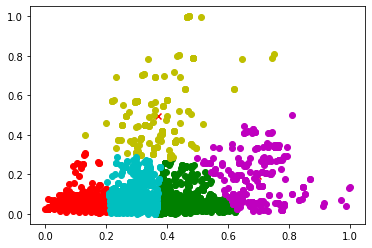

In [47]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

les_centres, l_affectation = clust.kmoyennes(5, data_2D_norm, 0.05, 100)

print("Affichage des centres: ",les_centres)

print("Dunn index : ", clust.dunn_index(les_centres))

clust.affiche_resultat(data_2D_norm,les_centres,l_affectation)

Iteration 1 Inertie : 24.5279 Difference : 3.5528
Iteration 2 Inertie : 23.1478 Difference : 1.3801
Iteration 3 Inertie : 22.4612 Difference : 0.6867
Iteration 4 Inertie : 22.0171 Difference : 0.4441
Iteration 5 Inertie : 21.8392 Difference : 0.1779
Iteration 6 Inertie : 21.7243 Difference : 0.1149
Iteration 7 Inertie : 21.3808 Difference : 0.3435
Iteration 8 Inertie : 20.7056 Difference : 0.6752
Iteration 9 Inertie : 20.1476 Difference : 0.5579
Iteration 10 Inertie : 19.7093 Difference : 0.4384
Iteration 11 Inertie : 19.335 Difference : 0.3743
Iteration 12 Inertie : 18.7349 Difference : 0.6001
Iteration 13 Inertie : 18.3898 Difference : 0.3451
Iteration 14 Inertie : 18.179 Difference : 0.2108
Iteration 15 Inertie : 18.095 Difference : 0.084
Iteration 16 Inertie : 17.9945 Difference : 0.1006
Iteration 17 Inertie : 17.927 Difference : 0.0675
Iteration 18 Inertie : 17.8962 Difference : 0.0308
Affichage des centres:  [[0.25187023+0.j 0.05821437+0.j]
 [0.60496185+0.j 0.07187899+0.j]
 [0.36

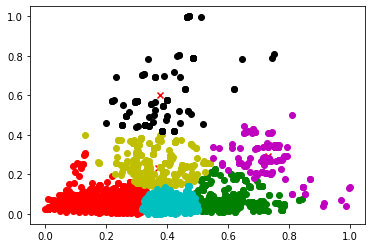

In [48]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

les_centres, l_affectation = clust.kmoyennes(7, data_2D_norm, 0.05, 100)

print("Affichage des centres: ",les_centres)

print("Dunn index : ", clust.dunn_index(les_centres))

clust.affiche_resultat(data_2D_norm,les_centres,l_affectation)

<div class="alert alert-info" role="alert">
 Ce que nous avons réalisé jusque là avec comme étiquette Score Unique :
    <ul>
    <li>Division des valeurs de l'attribut Score afin de construire des classes de prédiction (02 classes).</li>
    <li>Application de l'algorithme k-ppv avec comme valeur de k = 3.</li>
    <li>Application de l'algorithme du perceptron (avec cross-validation et avec train set evaluation.</li>
    <li>Application de l'algorithme d'arbre de décision.</li>
    <li>Application de l'algorithme de forêt aleatoire.</li>
    </ul>
</div>

<div class="alert alert-success" role="alert">
  Analyse des résultats:
    L'algorithme de k-ppv donne nettement de meilleurs résultats que les deux autres algorithmes utilisés.
</div>

***

# Exploration des bases de données Ingredient et Etape

In [83]:
d.columns

Index(['Groupe d'aliment', 'Sous-groupe d'aliment',
       'Transport par avion (1 : par avion)', 'Livraison',
       'Matériau d'emballage', 'Préparation',
       'DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)',
       'Score unique EF (mPt/kg de produit)',
       'Changement climatique (kg CO2 eq/kg de produit)',
       'Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)',
       'Rayonnements ionisants (kBq U-235 eq/kg de produit)',
       'Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)',
       'Particules (E-06 disease inc./kg de produit)',
       'Acidification terrestre et eaux douces (mol H+ eq/kg de produit)',
       'Eutrophisation terreste (mol N eq/kg de produit)',
       'Eutrophisation eaux douces (E-03 kg P eq/kg de produit)',
       'Eutrophisation marine (E-03 kg N eq/kg de produit)',
       'Utilisation du sol (Pt/kg de produit)',
       'Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit)',

In [100]:
np.unique(a[:,0])

array(['aides culinaires et ingrédients divers', 'aliments infantiles',
       'boissons', 'entrées et plats composés',
       'fruits, légumes, légumineuses et oléagineux', 'glaces et sorbets',
       'lait et produits laitiers', 'matières grasses',
       'produits céréaliers', 'produits sucrés',
       'viandes, œufs, poissons'], dtype=object)

In [13]:
def count_unique(a):
    l = []
    items={}
    c = 0
    for item in a:
        if str(item) not in items:
            items[str(item)] = c
            c += 1
        l.append(items[str(item)])
    return np.array(l)

In [15]:
c = ["Groupe d'aliment","Changement climatique (kg CO2 eq/kg de produit)"]
a = np.array(data_synthese[c])
x,y = count_unique(a[:,0]),a[:,1]

In [16]:
count_unique(x).shape

(2479,)

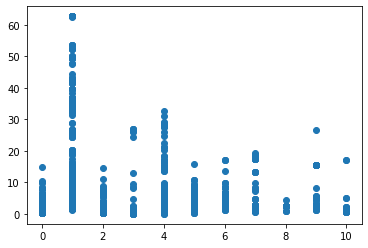

In [17]:
plt.scatter(x,y)

In [30]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

df = pd.DataFrame({'x': x, 'y': y})
les_centres, l_affectation = clust.kmoyennes(11, df, 0.05, 100)

print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)

Iteration 1 Inertie : 23871.576 Difference : 19276.7181
Iteration 2 Inertie : 20791.1858 Difference : 3080.3902
Iteration 3 Inertie : 16363.6919 Difference : 4427.4938
Iteration 4 Inertie : 14719.732 Difference : 1643.96
Iteration 5 Inertie : 14377.352 Difference : 342.3799
Iteration 6 Inertie : 14081.9248 Difference : 295.4272
Iteration 7 Inertie : 13845.4123 Difference : 236.5125
Iteration 8 Inertie : 12340.0955 Difference : 1505.3168
Iteration 9 Inertie : 11094.2304 Difference : 1245.8651
Iteration 10 Inertie : 10363.7639 Difference : 730.4665
Iteration 11 Inertie : 10235.0478 Difference : 128.716
Iteration 12 Inertie : 10194.6041 Difference : 40.4437
Iteration 13 Inertie : 10082.2288 Difference : 112.3753
Iteration 14 Inertie : 9973.7724 Difference : 108.4565
Iteration 15 Inertie : 9923.3395 Difference : 50.4329
Iteration 16 Inertie : 9885.538 Difference : 37.8015
Iteration 17 Inertie : 9870.6171 Difference : 14.9209
Iteration 18 Inertie : 9868.0977 Difference : 2.5194
Iteration 19

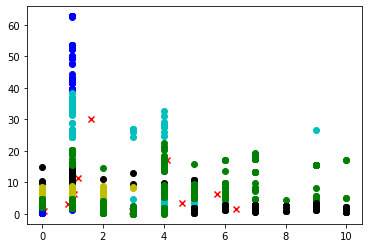

In [31]:
clust.affiche_resultat(df,les_centres,l_affectation)

le nombre de valeurs propres : 17
Dimension de l'ensemble de départ :  17
Dimension de l'ensemble après transformation :  2
---


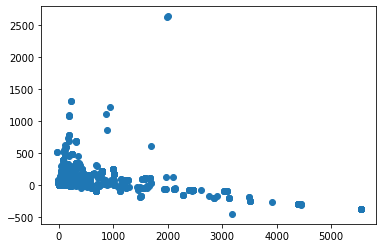

In [34]:
to_drop = ['Code AGB', 'Code CIQUAL','Nom du Produit en Français','Saisonnalité', 'LCI Name',"Groupe d'aliment", "Sous-groupe d'aliment",'Livraison',"Matériau d'emballage", 'Préparation',]
d = data_synthese.copy()
d.drop(to_drop,inplace = True, axis = 1)
Xr = ut.PCA(np.array(d))
data_2D = pd.DataFrame(Xr)
data_2D.columns = ['X','Y']
plt.scatter(data_2D["X"], data_2D["Y"])

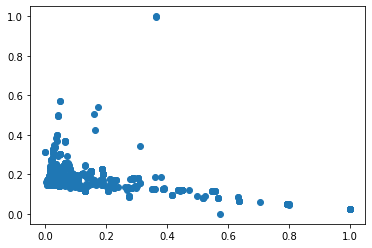

In [36]:
data_2D_norm =  clust.normalisation(data_2D)
plt.scatter(data_2D_norm["X"], data_2D_norm["Y"])

In [37]:
les_centres, l_affectation = clust.kmoyennes(11, data_2D_norm, 0.05, 100)

print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)

Iteration 1 Inertie : 13.3155 Difference : 9.8522
Iteration 2 Inertie : 9.7521 Difference : 3.5633
Iteration 3 Inertie : 8.3558 Difference : 1.3964
Iteration 4 Inertie : 7.2673 Difference : 1.0884
Iteration 5 Inertie : 6.2286 Difference : 1.0387
Iteration 6 Inertie : 5.5945 Difference : 0.6341
Iteration 7 Inertie : 5.3463 Difference : 0.2482
Iteration 8 Inertie : 4.9844 Difference : 0.3619
Iteration 9 Inertie : 4.1663 Difference : 0.8181
Iteration 10 Inertie : 3.9171 Difference : 0.2493
Iteration 11 Inertie : 3.4914 Difference : 0.4256
Iteration 12 Inertie : 3.3117 Difference : 0.1797
Iteration 13 Inertie : 3.1694 Difference : 0.1424
Iteration 14 Inertie : 3.0089 Difference : 0.1604
Iteration 15 Inertie : 2.8249 Difference : 0.184
Iteration 16 Inertie : 2.6364 Difference : 0.1885
Iteration 17 Inertie : 2.5459 Difference : 0.0906
Iteration 18 Inertie : 2.4714 Difference : 0.0745
Iteration 19 Inertie : 2.346 Difference : 0.1254
Iteration 20 Inertie : 2.3382 Difference : 0.0078
Affichage 

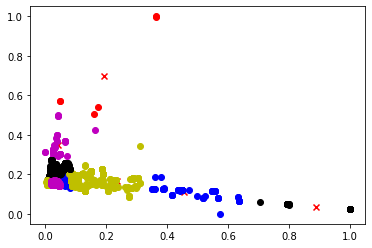

In [38]:
clust.affiche_resultat(data_2D_norm,les_centres,l_affectation)

# Base de données ingrédients

In [15]:
data_ingredient = pd.read_csv("Donnees_Agribalyse/detail_ingredient.csv")
data_ingredient.columns
print("Taille du dataset: ",data_ingredient.shape)

Taille du dataset:  (5671, 22)


In [16]:
data_ingredient.head(5)

,Ciqual AGB,Ciqual code,Nom Français,Groupe d'aliment,Sous-groupe d'aliment,LCI Name,Ingredients,Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jaune d'œuf,0.039743,0.164754,0.014089,...,0.046616,0.006761,0.029441,0.052027,1.329230,16.984964,7.404112,0.337769,1.475548,0.251356
1,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Ail,0.004417,0.011444,0.002512,...,0.000781,0.000105,0.000328,0.004760,0.189983,1.643787,1.216336,0.291209,0.229937,0.084028
2,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jus de citron,0.019375,0.061230,0.007842,...,0.006365,0.000951,0.003573,0.016918,0.213721,3.707242,2.625043,1.445978,0.793865,0.203959
3,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Huile d'olive,0.445364,1.161825,0.136467,...,0.142041,0.021524,0.088459,0.554361,9.263219,7.579606,464.100950,9.374618,12.100965,4.424012
4,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Autres étapes,0.080761,0.571172,0.126768,...,0.024611,0.002630,0.008368,0.090374,1.295442,4.529954,11.433712,0.759522,22.626111,1.278583


In [17]:
data_ingredient.tail()

,Ciqual AGB,Ciqual code,Nom Français,Groupe d'aliment,Sous-groupe d'aliment,LCI Name,Ingredients,Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
5666,19552,19552,"Yaourt à la grecque, sur lit de fruits",lait et produits laitiers,produits laitiers frais et assimilés,"Yogurt, Greek-style, on a bed of fruits",Fraise,0.121232,0.113532,0.637141,...,0.027982,0.000952,0.003176,0.035963,0.370286,3.561618,195.859930,1.702002,1.587775,3.330941
5667,19552,19552,"Yaourt à la grecque, sur lit de fruits",lait et produits laitiers,produits laitiers frais et assimilés,"Yogurt, Greek-style, on a bed of fruits",Autres étapes,0.070305,0.549462,0.115755,...,0.023034,0.002426,0.007428,0.080773,1.159934,4.096425,6.238759,0.248905,21.610336,1.176044
5668,19860,19860,"Yaourt à la grecque, nature",lait et produits laitiers,produits laitiers frais et assimilés,"Yogurt, Greek-style, plain",Lait,0.063101,0.693950,0.010273,...,0.043025,0.006846,0.029968,0.047026,8.579385,62.085522,1.178242,0.013914,1.062461,0.019234
5669,19860,19860,"Yaourt à la grecque, nature",lait et produits laitiers,produits laitiers frais et assimilés,"Yogurt, Greek-style, plain",Lait demi-écremé,0.106409,1.198262,0.031746,...,0.089744,0.013406,0.058485,0.107689,3.903060,66.972761,17.562407,0.373698,3.073724,0.642726
5670,19860,19860,"Yaourt à la grecque, nature",lait et produits laitiers,produits laitiers frais et assimilés,"Yogurt, Greek-style, plain",Autres étapes,0.070305,0.549462,0.115755,...,0.023034,0.002426,0.007428,0.080773,1.159934,4.096425,6.238759,0.248905,21.610336,1.176044


In [20]:
data_ingredient.columns

Index(['Ciqual AGB', 'Ciqual code', 'Nom Français', 'Groupe d'aliment',
       'Sous-groupe d'aliment', 'LCI Name', 'Ingredients',
       'Score unique EF (mPt/kg de produit)',
       'Changement climatique (kg CO2 eq/kg de produit)',
       'Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)',
       'Rayonnements ionisants (kBq U-235 eq/kg de produit)',
       'Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)',
       'Particules (E-06 disease inc./kg de produit)',
       'Acidification terrestre et eaux douces (mol H+ eq/kg de produit)',
       'Eutrophisation terreste (mol N eq/kg de produit)',
       'Eutrophisation eaux douces (E-03 kg P eq/kg de produit)',
       'Eutrophisation marine (E-03 kg N eq/kg de produit)',
       'Utilisation du sol (Pt/kg de produit)',
       'Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit)',
       'Épuisement des ressources eau (m3 depriv./kg de produit)',
       'Épuisement des ressources 

In [18]:
data_ingredient.describe()

,Ciqual AGB,Ciqual code,Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),Rayonnements ionisants (kBq U-235 eq/kg de produit),Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit),Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
count,5671.000000,5671.000000,5671.000000,5671.000000,5671.000000,5671.000000,5671.000000,5671.000000,5671.000000,5671.000000,5671.000000,5671.000000,5671.000000,5671.000000,5671.000000,5671.000000,5671.000000
mean,22163.993476,22163.993476,0.094535,0.769163,0.067837,0.225749,2.375956,0.070389,0.009830,0.039485,0.116352,3.251455,37.084758,18.626661,0.886282,8.366909,1.134560
std,9122.684878,9122.684878,0.218044,2.107535,0.165024,0.757643,10.514584,0.211329,0.030989,0.126562,0.260584,8.032954,131.995373,49.080276,3.363757,19.830675,2.062187
min,1007.000000,1007.000000,0.000000,-0.006669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.575287,0.000000,0.000000,0.000000,0.000000
25%,16741.000000,16741.000000,0.013456,0.061778,0.006064,0.006529,0.261106,0.006712,0.000898,0.003360,0.018847,0.422507,3.216551,2.818496,0.112265,0.615664,0.167689
50%,24686.000000,24686.000000,0.041018,0.214772,0.016907,0.022799,0.772146,0.024329,0.002624,0.008651,0.053117,1.204835,8.562092,6.664536,0.288104,1.698155,0.459293
75%,25605.000000,25605.000000,0.081438,0.585656,0.093550,0.143838,1.594189,0.045122,0.006258,0.026146,0.107614,2.443920,26.754006,15.312990,0.578456,11.389242,1.256538
max,96778.000000,96778.000000,3.097321,35.890458,3.460422,33.388781,323.582360,3.283005,0.488213,2.170038,8.978935,121.141130,2863.439100,1176.701700,82.966840,742.560020,30.719730


In [19]:
data_ingredient.info

<bound method DataFrame.info of       Ciqual AGB  Ciqual code                            Nom Français  \
0          11168        11168                Sauce aïoli, préemballée   
1          11168        11168                Sauce aïoli, préemballée   
2          11168        11168                Sauce aïoli, préemballée   
3          11168        11168                Sauce aïoli, préemballée   
4          11168        11168                Sauce aïoli, préemballée   
...          ...          ...                                     ...   
5666       19552        19552  Yaourt à la grecque, sur lit de fruits   
5667       19552        19552  Yaourt à la grecque, sur lit de fruits   
5668       19860        19860             Yaourt à la grecque, nature   
5669       19860        19860             Yaourt à la grecque, nature   
5670       19860        19860             Yaourt à la grecque, nature   

                            Groupe d'aliment  \
0     aides culinaires et ingrédients diver

# Base de données Etape

In [24]:
data_etape = pd.read_csv("Donnees_Agribalyse/detail_etape.csv")
data_etape.columns
print("Taille du dataset: ",data_etape.shape)

Taille du dataset:  (2480, 102)


In [25]:
data_etape.head(5)

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,DQR,Nom et code,Score unique EF (mPt / kg de produit) - Agriculture,Score unique EF (mPt / kg de produit) - Transformation,...,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Agriculture,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transformation,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Emballage,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transport,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Supermarché et distribution,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Consommation,DQR - P,DQR - TiR,DQR - GR,DQR - TeR
0,12112,12112,lait et produits laitiers,fromages,Abondance,"Abondance cheese, from cow's milk",2.24,Abondance (12112),0.470679,0.046274,...,2.855985,0.552672,0.108718,0.985193,0.148203,0.042714,2.84,2.05,1.18,2.87
1,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",2.46,"Abricot au sirop léger, appertisé, égoutté (13...",0.061297,0.075215,...,1.281828,0.477989,0.220289,0.679414,0.263117,0.015426,2.25,3.62,1.96,2.01
2,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",2.46,"Abricot au sirop léger, appertisé, non égoutté...",0.038249,0.046934,...,0.799861,0.298265,0.137461,0.423954,0.164185,0.000000,2.25,3.62,1.96,2.01
3,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",2.46,"Abricot au sirop, appertisé, égoutté (13714)",0.061297,0.075215,...,1.281828,0.477989,0.220289,0.679414,0.263117,0.015426,2.25,3.62,1.96,2.01
4,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",2.44,"Abricot au sirop, appertisé, non égoutté (13715)",0.038249,0.046934,...,0.799861,0.298265,0.137461,0.423954,0.164185,0.000000,2.21,3.65,1.92,1.97


In [27]:
data_etape.tail()

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,DQR,Nom et code,Score unique EF (mPt / kg de produit) - Agriculture,Score unique EF (mPt / kg de produit) - Transformation,...,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Agriculture,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transformation,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Emballage,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transport,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Supermarché et distribution,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Consommation,DQR - P,DQR - TiR,DQR - GR,DQR - TeR
2475,19592,19592,lait et produits laitiers,produits laitiers frais et assimilés,"Yaourt, lait fermenté ou spécialité laitière, ...","Yogurt, fermented milk or dairy specialty, wit...",3.61,"Yaourt, lait fermenté ou spécialité laitière, ...",0.277819,0.031048,...,3.780829,0.253532,0.069836,0.725770,0.148203,0.042714,2.20,3.96,3.28,5.00
2476,19593,19593,lait et produits laitiers,produits laitiers frais et assimilés,"Yaourt, lait fermenté ou spécialité laitière, ...","Yogurt, fermented milk or dairy specialty, plain",2.04,"Yaourt, lait fermenté ou spécialité laitière, ...",0.168020,0.031331,...,0.655855,0.254659,0.069836,0.666737,0.148203,0.042714,2.47,1.87,1.79,2.02
2477,19594,19594,lait et produits laitiers,produits laitiers frais et assimilés,"Yaourt, lait fermenté ou spécialité laitière, ...","Yogurt, fermented milk or dairy specialty, pla...",2.48,"Yaourt, lait fermenté ou spécialité laitière, ...",0.168020,0.031331,...,0.655855,0.254659,0.069836,0.666737,0.148203,0.042714,3.35,1.87,1.79,2.91
2478,19598,19598,lait et produits laitiers,produits laitiers frais et assimilés,"Yaourt, lait fermenté ou spécialité laitière, ...","Yogurt, fermented milk or dairy specialty, pla...",1.90,"Yaourt, lait fermenté ou spécialité laitière, ...",0.180150,0.039865,...,1.058970,0.871713,0.069836,0.667499,0.148203,0.042714,2.47,1.87,1.79,1.48
2479,19599,19599,lait et produits laitiers,produits laitiers frais et assimilés,"Yaourt, lait fermenté ou spécialité laitière, ...","Yogurt, fermented milk or dairy specialty, pla...",1.90,"Yaourt, lait fermenté ou spécialité laitière, ...",0.108344,0.032225,...,0.681681,0.263583,0.069836,0.672753,0.148203,0.042714,2.47,1.87,1.79,1.48


In [29]:
data_etape.describe()

,Code CIQUAL,DQR,Score unique EF (mPt / kg de produit) - Agriculture,Score unique EF (mPt / kg de produit) - Transformation,Score unique EF (mPt / kg de produit) - Emballage,Score unique EF (mPt / kg de produit) - Transport,Score unique EF (mPt / kg de produit) - Supermarché et distribution,Score unique EF (mPt / kg de produit) - Consommation,Changement climatique (kg CO2 eq/kg de produit) - Agriculture,Changement climatique (kg CO2 eq/kg de produit) - Transformation,...,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Agriculture,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transformation,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Emballage,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transport,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Supermarché et distribution,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Consommation,DQR - P,DQR - TiR,DQR - GR,DQR - TeR
count,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,...,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000
mean,22441.909274,2.809867,0.596392,0.050175,0.022243,0.024483,0.010914,0.008202,4.974590,0.287157,...,6.525864,0.775480,0.463087,0.991304,0.179595,0.119258,3.073294,2.614226,2.450863,3.102117
std,14033.651505,0.542481,0.858677,0.094908,0.018754,0.034569,0.007413,0.012901,9.024005,0.471488,...,18.238873,1.332905,2.859853,1.061823,0.122986,0.195082,0.834341,0.833306,0.895195,0.978380
min,1000.000000,1.600000,0.000000,0.000000,0.000000,0.000228,0.000044,0.000000,-0.248977,0.000000,...,0.000000,0.000000,0.000000,0.004992,0.000724,0.000000,1.310000,1.180000,1.050000,1.090000
25%,12758.750000,2.430000,0.089788,0.000000,0.016119,0.013755,0.008827,0.000347,0.361651,0.000000,...,1.213543,0.000000,0.035759,0.513243,0.148203,0.006102,2.400000,2.020000,1.770000,2.340000
50%,20510.500000,2.760000,0.274276,0.033888,0.019502,0.017224,0.008979,0.002429,1.810235,0.172938,...,2.855985,0.338031,0.108718,0.747366,0.149025,0.042714,2.920000,2.540000,2.340000,3.050000
75%,26104.500000,3.110000,0.702145,0.056234,0.022106,0.021994,0.011180,0.007256,4.999451,0.344879,...,6.795029,0.768554,0.211733,0.957510,0.184238,0.113261,3.720000,3.130000,3.050000,3.650000
max,96778.000000,4.870000,5.979301,1.802873,0.221301,1.041045,0.063884,0.142275,61.731165,7.062611,...,253.140040,17.065159,38.492361,14.273753,1.063113,1.193836,5.000000,4.840000,4.840000,5.000000


In [32]:
for c in data_etape.columns:
    print(c)

Code AGB
Code CIQUAL
Groupe d'aliment
Sous-groupe d'aliment
Nom du Produit en Français
LCI Name
DQR
Nom et code
Score unique EF (mPt / kg de produit) - Agriculture
Score unique EF (mPt / kg de produit) - Transformation
Score unique EF (mPt / kg de produit) - Emballage
Score unique EF (mPt / kg de produit) - Transport
Score unique EF (mPt / kg de produit) - Supermarché et distribution
Score unique EF (mPt / kg de produit) - Consommation
Changement climatique (kg CO2 eq/kg de produit) - Agriculture
Changement climatique (kg CO2 eq/kg de produit) - Transformation
Changement climatique (kg CO2 eq/kg de produit) - Emballage
Changement climatique (kg CO2 eq/kg de produit) - Transport
Changement climatique (kg CO2 eq/kg de produit) - Supermarché et distribution
Changement climatique (kg CO2 eq/kg de produit) - Consommation
Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit) - Agriculture
Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit) - Transformation
A

In [31]:
data_etape.info

<bound method DataFrame.info of      Code AGB  Code CIQUAL                             Groupe d'aliment  \
0       12112        12112                    lait et produits laitiers   
1       13712        13712  fruits, légumes, légumineuses et oléagineux   
2       13713        13713  fruits, légumes, légumineuses et oléagineux   
3       13714        13714  fruits, légumes, légumineuses et oléagineux   
4       13715        13715  fruits, légumes, légumineuses et oléagineux   
...       ...          ...                                          ...   
2475    19592        19592                    lait et produits laitiers   
2476    19593        19593                    lait et produits laitiers   
2477    19594        19594                    lait et produits laitiers   
2478    19598        19598                    lait et produits laitiers   
2479    19599        19599                    lait et produits laitiers   

                     Sous-groupe d'aliment  \
0                    

## Bibliographie et ressources
https://www.altexsoft.com/blog/datascience/how-to-organize-data-labeling-for-machine-learning-approaches-and-tools/